# Feature engineering for the dream house

#### Find the factors that influence price negotiations while buying a house.

##### Understand the dataset

In [1]:
# import dependencies
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2_contingency
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load in the data
df=pd.read_csv("PEP1.csv")

In [3]:
# size of data
df.shape

(1460, 81)

In [4]:
# display all the rows
pd.set_option('display.max_rows', None)

In [5]:
#pandas_profiling.ProfileReport(df)

In [6]:
# amount of missing values
df.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
LotConfig           0
OverallCond         0
OverallQual         0
HouseStyle          0
BldgType            0
Condition2          0
BsmtFinSF1          0
MSZoning            0
LotArea             0
Street              0
Condition1          0
Neighborhood        0
LotShape            0
LandContour         0
LandSlope           0
SalePrice 

In [7]:
# % of missing values
df.isnull().sum().sort_values(ascending=False)*100/1460

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
LotFrontage      17.739726
GarageCond        5.547945
GarageType        5.547945
GarageYrBlt       5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtExposure      2.602740
BsmtFinType2      2.602740
BsmtFinType1      2.534247
BsmtCond          2.534247
BsmtQual          2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
Utilities         0.000000
YearRemodAdd      0.000000
MSSubClass        0.000000
Foundation        0.000000
ExterCond         0.000000
ExterQual         0.000000
Exterior2nd       0.000000
Exterior1st       0.000000
RoofMatl          0.000000
RoofStyle         0.000000
YearBuilt         0.000000
LotConfig         0.000000
OverallCond       0.000000
OverallQual       0.000000
HouseStyle        0.000000
BldgType          0.000000
Condition2        0.000000
BsmtFinSF1        0.000000
M

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
# identify variables with unique values
for i in df.columns:
    print (i , df[i].unique())
    print (" - "*56)

Id [   1    2    3 ... 1458 1459 1460]
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
MSSubClass [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
LotFrontage [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174

In [10]:
#unique variables
df.nunique().sort_values()

CentralAir          2
Utilities           2
Street              2
Alley               2
BsmtHalfBath        3
LandSlope           3
GarageFinish        3
HalfBath            3
PavedDrive          3
PoolQC              3
FullBath            4
MasVnrType          4
BsmtExposure        4
ExterQual           4
MiscFeature         4
BsmtFullBath        4
Fence               4
KitchenQual         4
BsmtCond            4
Fireplaces          4
LandContour         4
LotShape            4
KitchebvGr          4
BsmtQual            4
FireplaceQu         5
Electrical          5
YrSold              5
GarageCars          5
GarageQual          5
GarageCond          5
HeatingQC           5
ExterCond           5
MSZoning            5
LotConfig           5
BldgType            5
BsmtFinType2        6
Foundation          6
RoofStyle           6
SaleCondition       6
GarageType          6
BsmtFinType1        6
Heating             6
Functiol            7
RoofMatl            8
HouseStyle          8
Condition2

### Generate a separate dataset for numerical variables

In [11]:
#generate a dataset for numerical variables
df_num=df.select_dtypes(include=[np.number])
df_num.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

In [12]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

### EDA of numerical variables

In [13]:
# missing numerical data
df_num.isnull().sum().sort_values(ascending=False)

LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
BsmtFinSF1         0
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
TotalBsmtSF        0
BsmtUnfSF          0
BsmtFinSF2         0
SalePrice          0
BsmtFullBath       0
YearRemodAdd       0
YearBuilt          0
OverallCond        0
OverallQual        0
LotArea            0
MSSubClass         0
GrLivArea          0
BsmtHalfBath       0
YrSold             0
FullBath           0
MoSold             0
MiscVal            0
PoolArea           0
ScreenPorch        0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
GarageArea         0
GarageCars         0
Fireplaces         0
TotRmsAbvGrd       0
KitchebvGr         0
BedroomAbvGr       0
HalfBath           0
Id                 0
dtype: int64

In [14]:
# drop missing data
df_nd = df_num.dropna()

In [15]:
# check if dropped
df_nd.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchebvGr       0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [16]:
#Checking the skewness of entire data
df.skew(axis = 0, skipna = True)

Id                0.000000
MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchebvGr        4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

In [17]:
#Checking skewness and kurtosis of SalePrice
print("Skewness: %f" % df['SalePrice'].skew())

Skewness: 1.882876


In [18]:
n=np.ceil(df_num.shape[1]/2).astype(int)
n

19

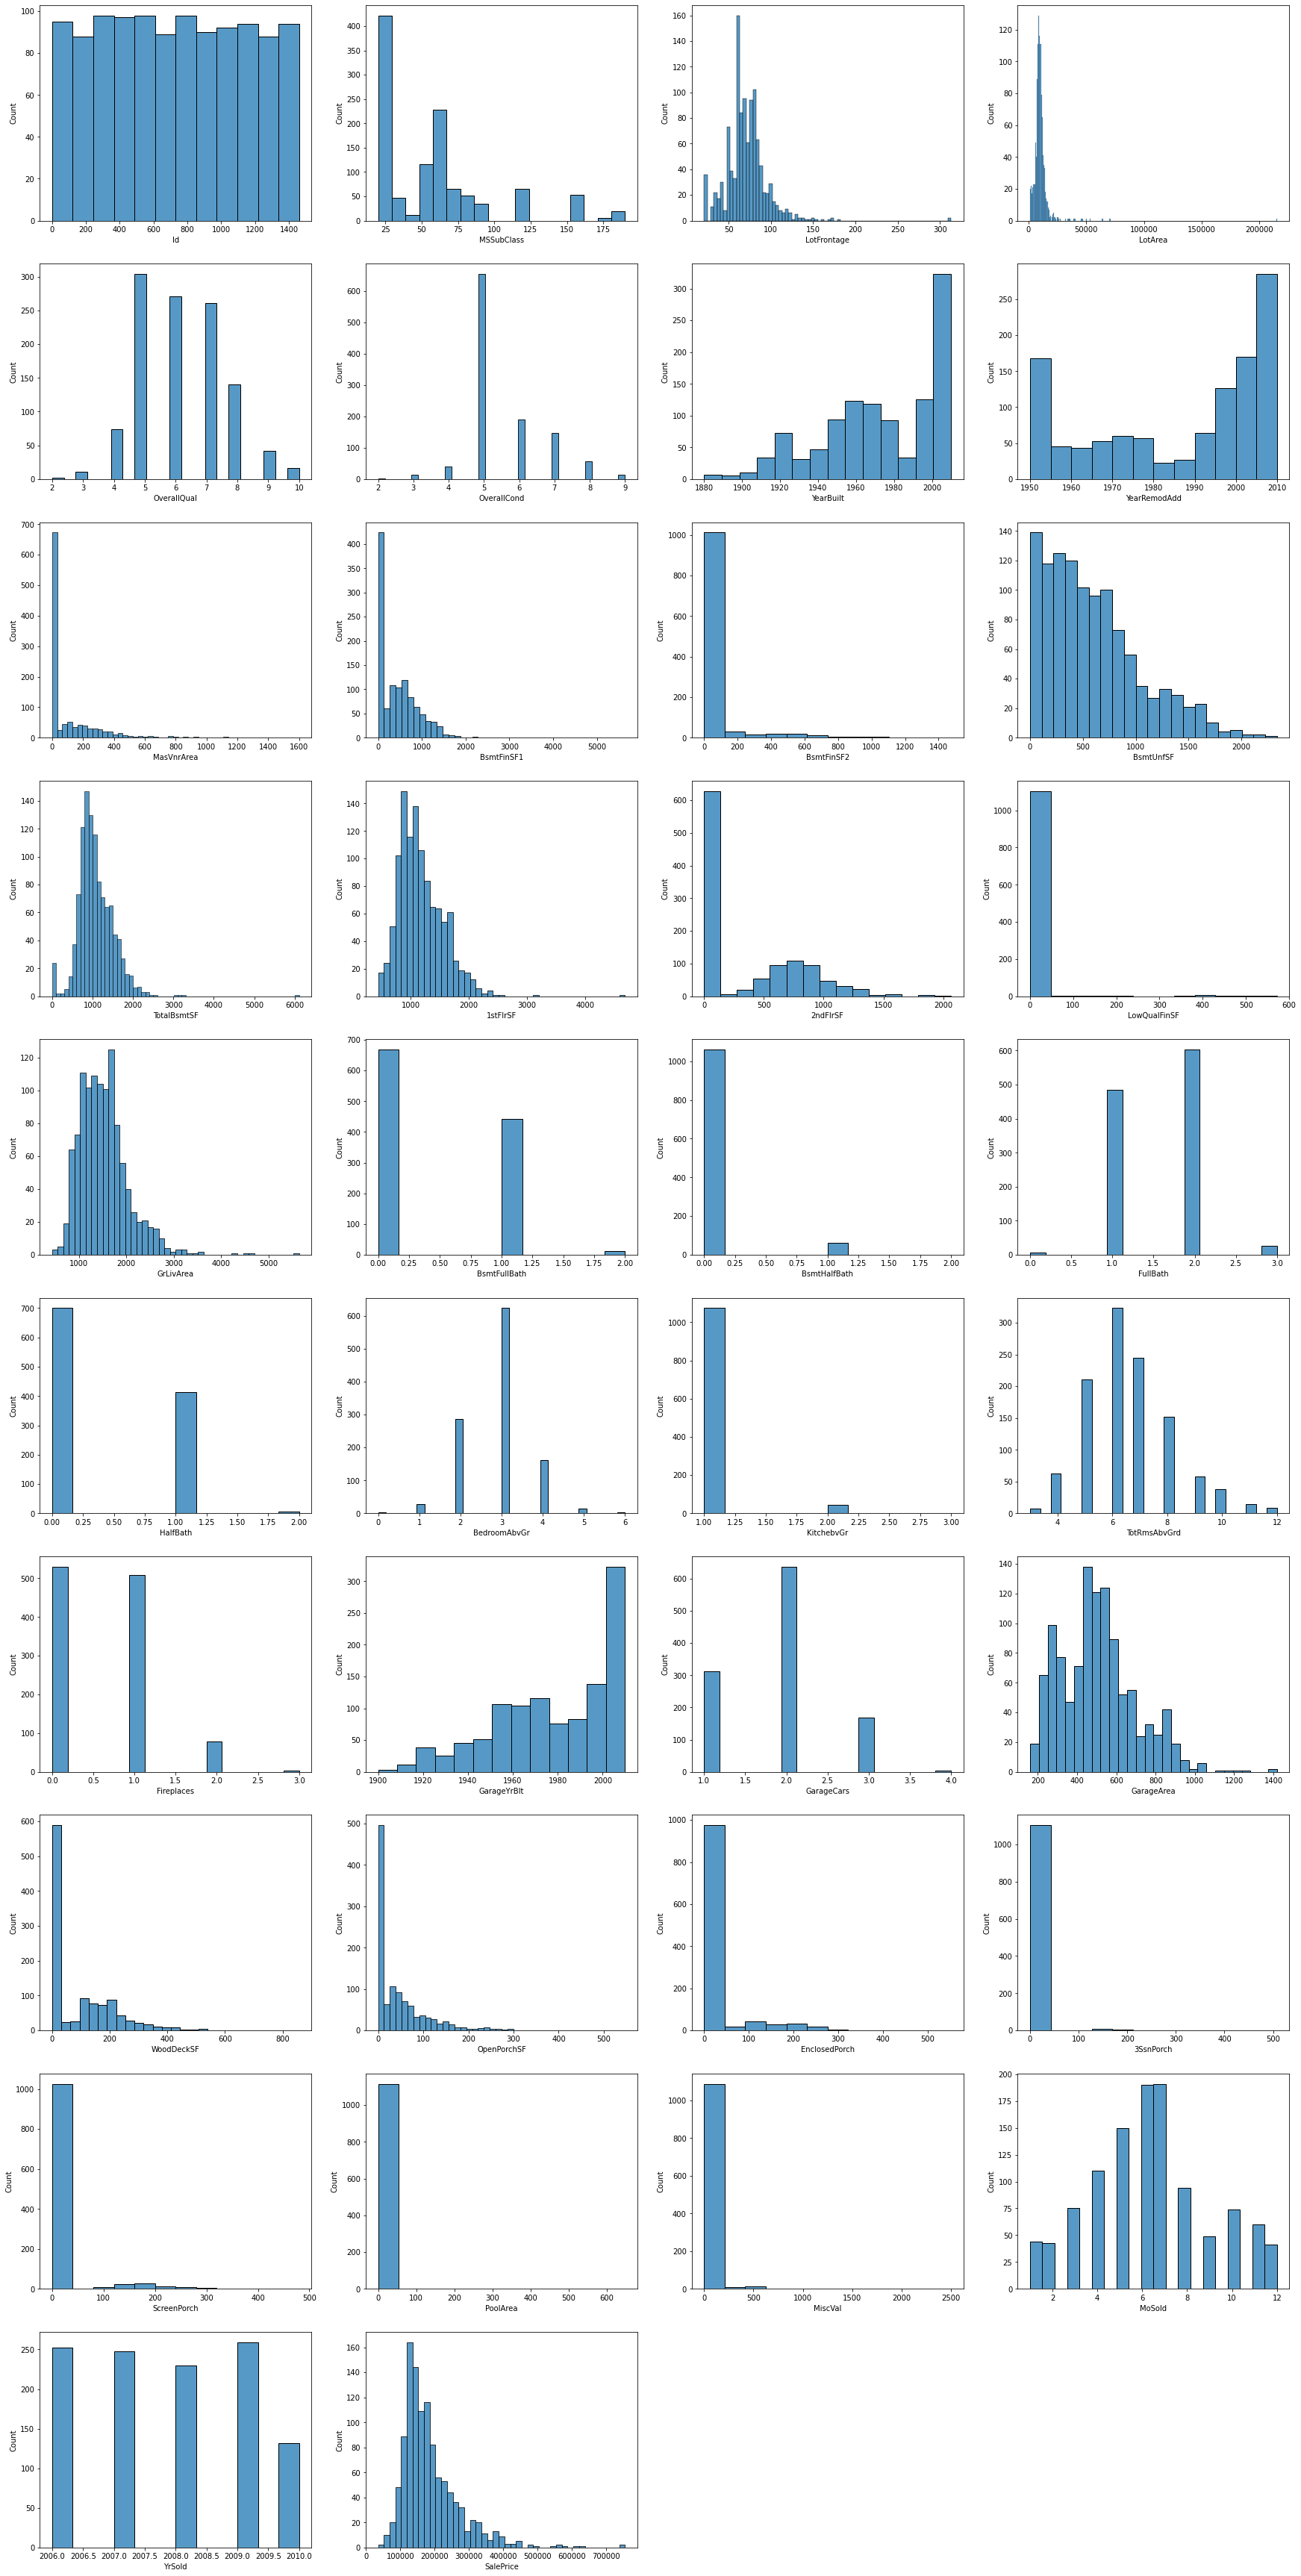

In [19]:
# showing skew and distribution. besides the years things are made, most things are right skewed.
plt.figure(figsize=(30,120))
for i,j in enumerate(df_nd.columns):
    plt.subplot(n,4,i+1)
    sns.histplot(data=df_nd,x=j)
plt.show()

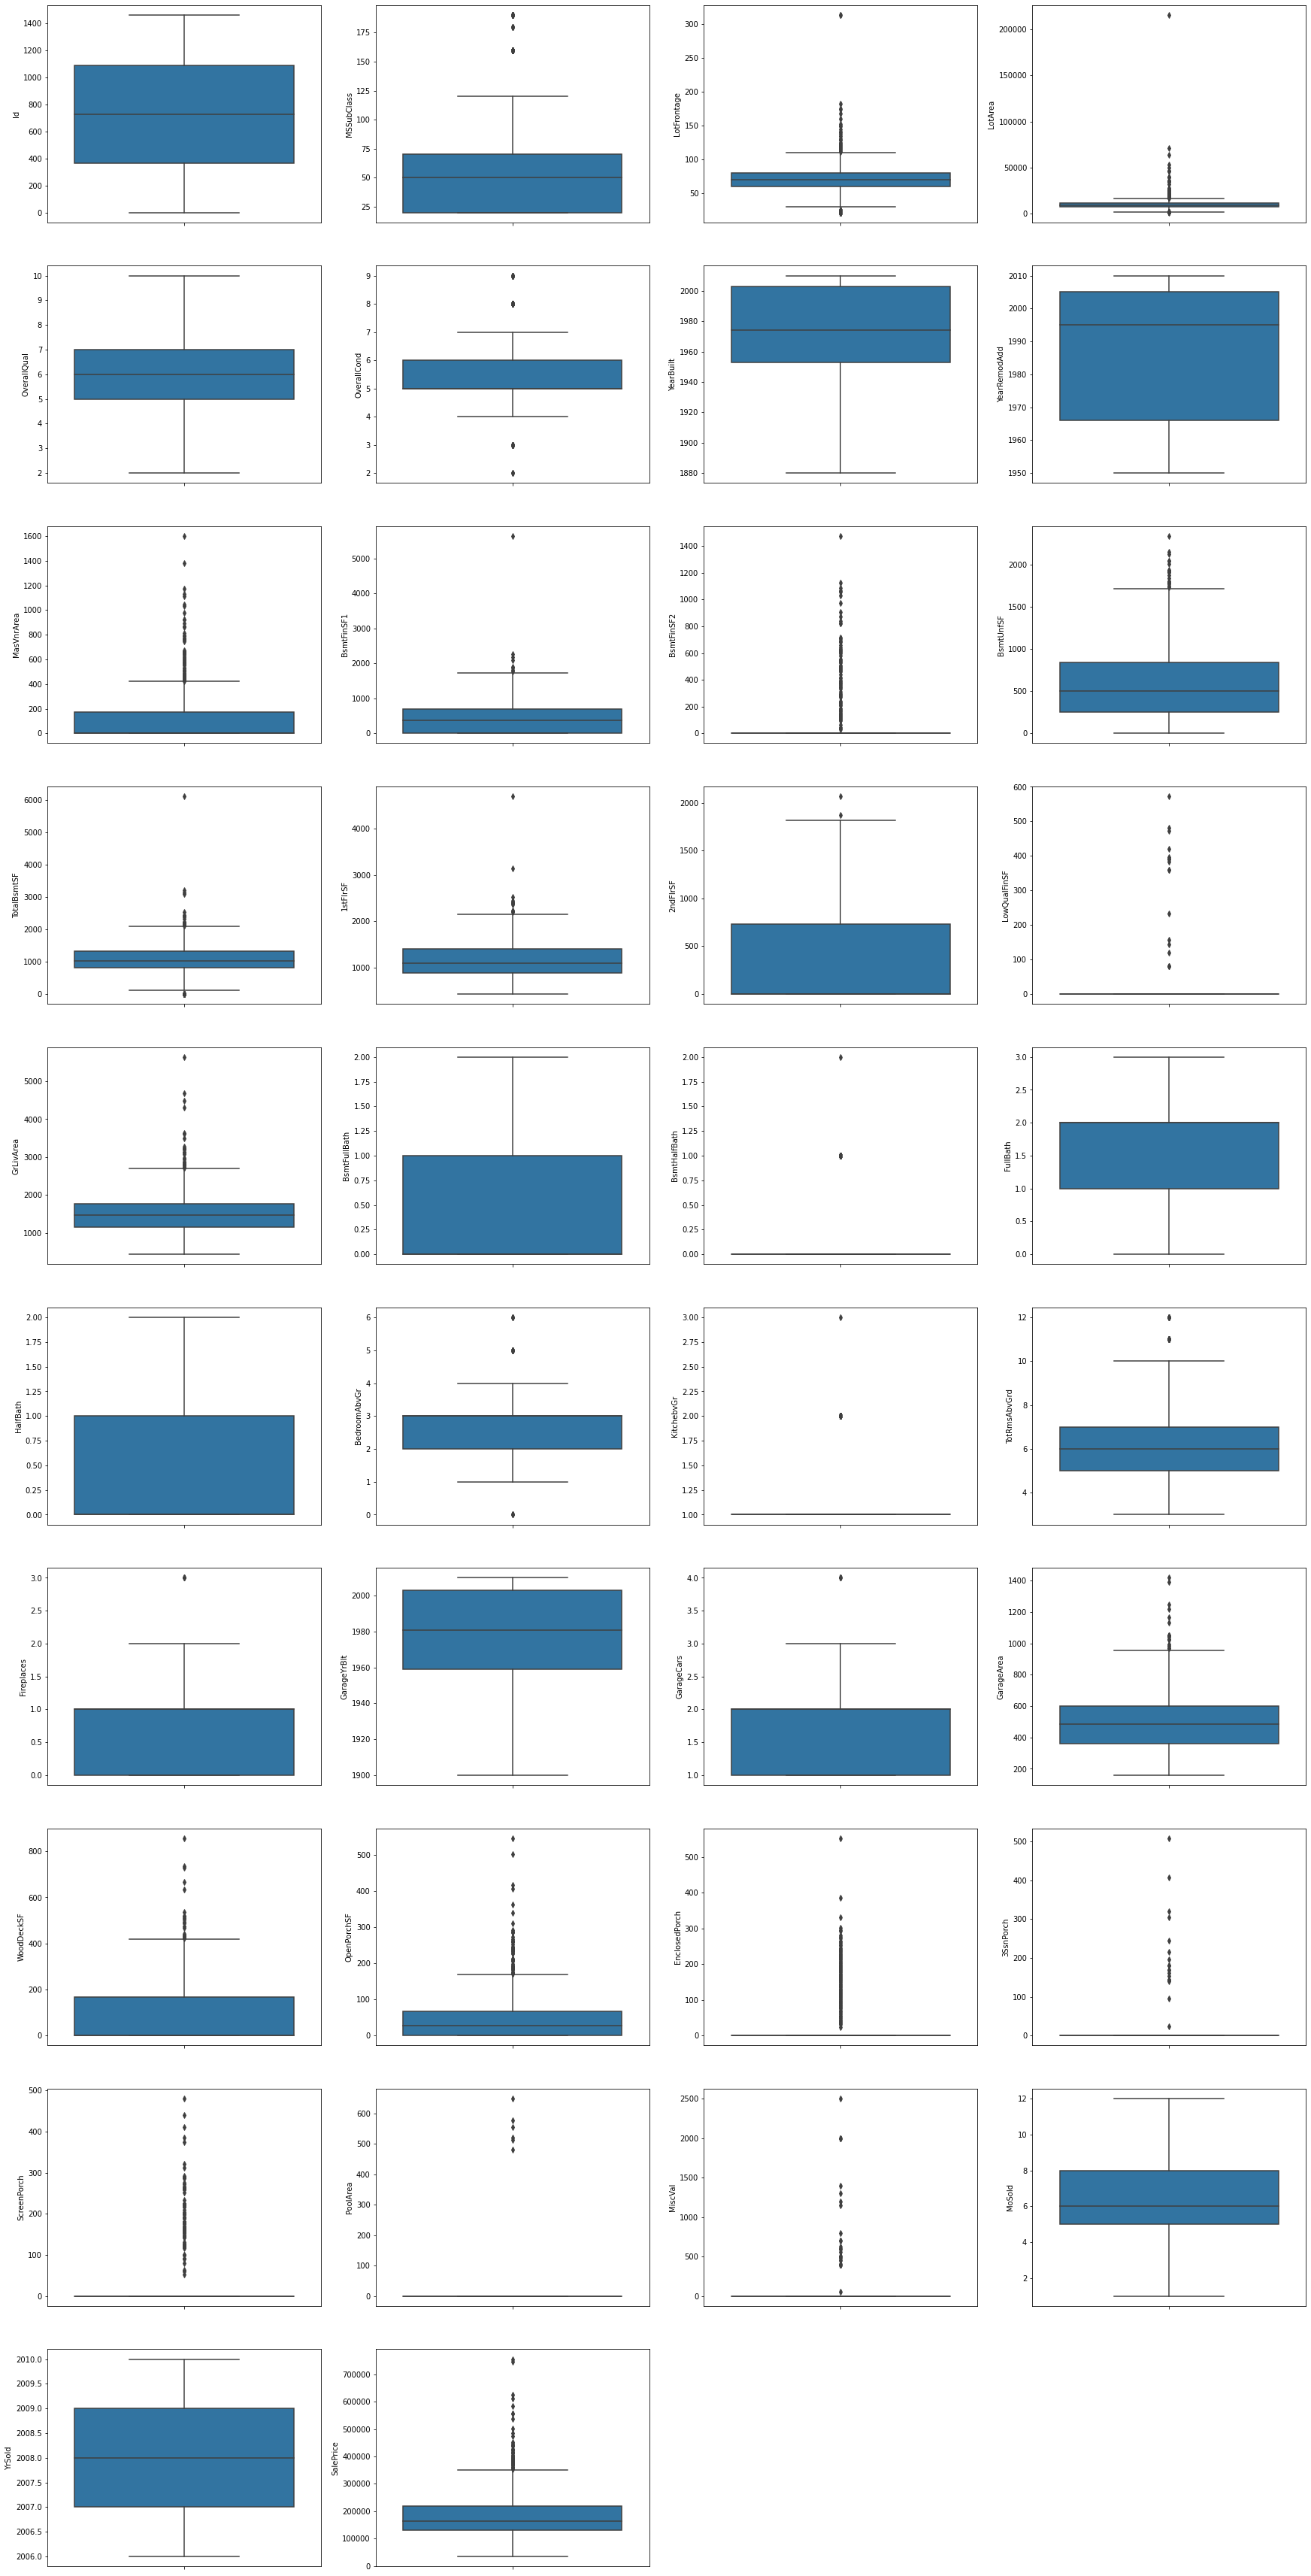

In [20]:
# looking at outliers
plt.figure(figsize=(30,120))
for i,j in enumerate(df_nd.columns):
    plt.subplot(n,4,i+1)
    sns.boxplot(data=df_nd,y=j)
plt.show()

In [21]:
# checking for max house price
df_nd.SalePrice.describe()

count      1121.000000
mean     185506.152542
std       82999.159004
min       35311.000000
25%      131000.000000
50%      164900.000000
75%      219500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [22]:
# looking at top 5 house price info
df_nd.sort_values(by='SalePrice', ascending=False).head().transpose()

691       1182      1169      898       803 
Id                692.0    1183.0    1170.0     899.0     804.0
MSSubClass         60.0      60.0      60.0      20.0      60.0
LotFrontage       104.0     160.0     118.0     100.0     107.0
LotArea         21535.0   15623.0   35760.0   12919.0   13891.0
OverallQual        10.0      10.0      10.0       9.0       9.0
OverallCond         6.0       5.0       5.0       5.0       5.0
YearBuilt        1994.0    1996.0    1995.0    2009.0    2008.0
YearRemodAdd     1995.0    1996.0    1996.0    2010.0    2009.0
MasVnrArea       1170.0       0.0    1378.0     760.0     424.0
BsmtFinSF1       1455.0    2096.0    1387.0    2188.0       0.0
BsmtFinSF2          0.0       0.0       0.0       0.0       0.0
BsmtUnfSF         989.0     300.0     543.0     142.0    1734.0
TotalBsmtSF      2444.0    2396.0    1930.0    2330.0    1734.0
1stFlrSF         2444.0    2411.0    1831.0    2364.0    1734.0
2ndFlrSF         1872.0    2065.0    1796.0       0.0    1088.0
LowQualFinSF        0.0       0.0       0.0       0.0       0.0
GrLivArea        4316.0    4476.0    3627.0    2364.0    2822.0
BsmtFullBath        0.0       1.0       1.0       1.0       0.0
BsmtHalfBath        1.0       0.0       0.0       0.0       0.0
FullBath            3.0       3.0       3.0       2.0       3.0
HalfBath            1.0       1.0       1.0       1.0       1.0
BedroomAbvGr        4.0       4.0       4.0       2.0       4.0
KitchebvGr          1.0       1.0       1.0       1.0       1.0
TotRmsAbvGrd       10.0      10.0      10.0      11.0      12.0
Fireplaces          2.0       2.0       1.0       2.0       1.0
GarageYrBlt      1994.0    1996.0    1995.0    2009.0    2009.0
GarageCars          3.0       3.0       3.0       3.0       3.0
GarageArea        832.0     813.0     807.0     820.0    1020.0
WoodDeckSF        382.0     171.0     361.0       0.0      52.0
OpenPorchSF        50.0      78.0      76.0      67.0     170.0
EnclosedPorch       0.0       0.0       0.0       0.0       0.0
3SsnPorch           0.0       0.0       0.0       0.0       0.0
ScreenPorch         0.0       0.0       0.0       0.0     192.0
PoolArea            0.0     555.0       0.0       0.0       0.0
MiscVal             0.0       0.0       0.0       0.0       0.0
MoSold              1.0       7.0       7.0       3.0       1.0
YrSold           2007.0    2007.0    2006.0    2010.0    2009.0
SalePrice      755000.0  745000.0  625000.0  611657.0  582933.0

In [23]:
# dropping the id column because no need
df_nd.drop('Id', axis=1, inplace=True)

In [24]:
#Code to find correlation
corr = df_nd.corr()
corr.style.background_gradient(cmap='coolwarm')

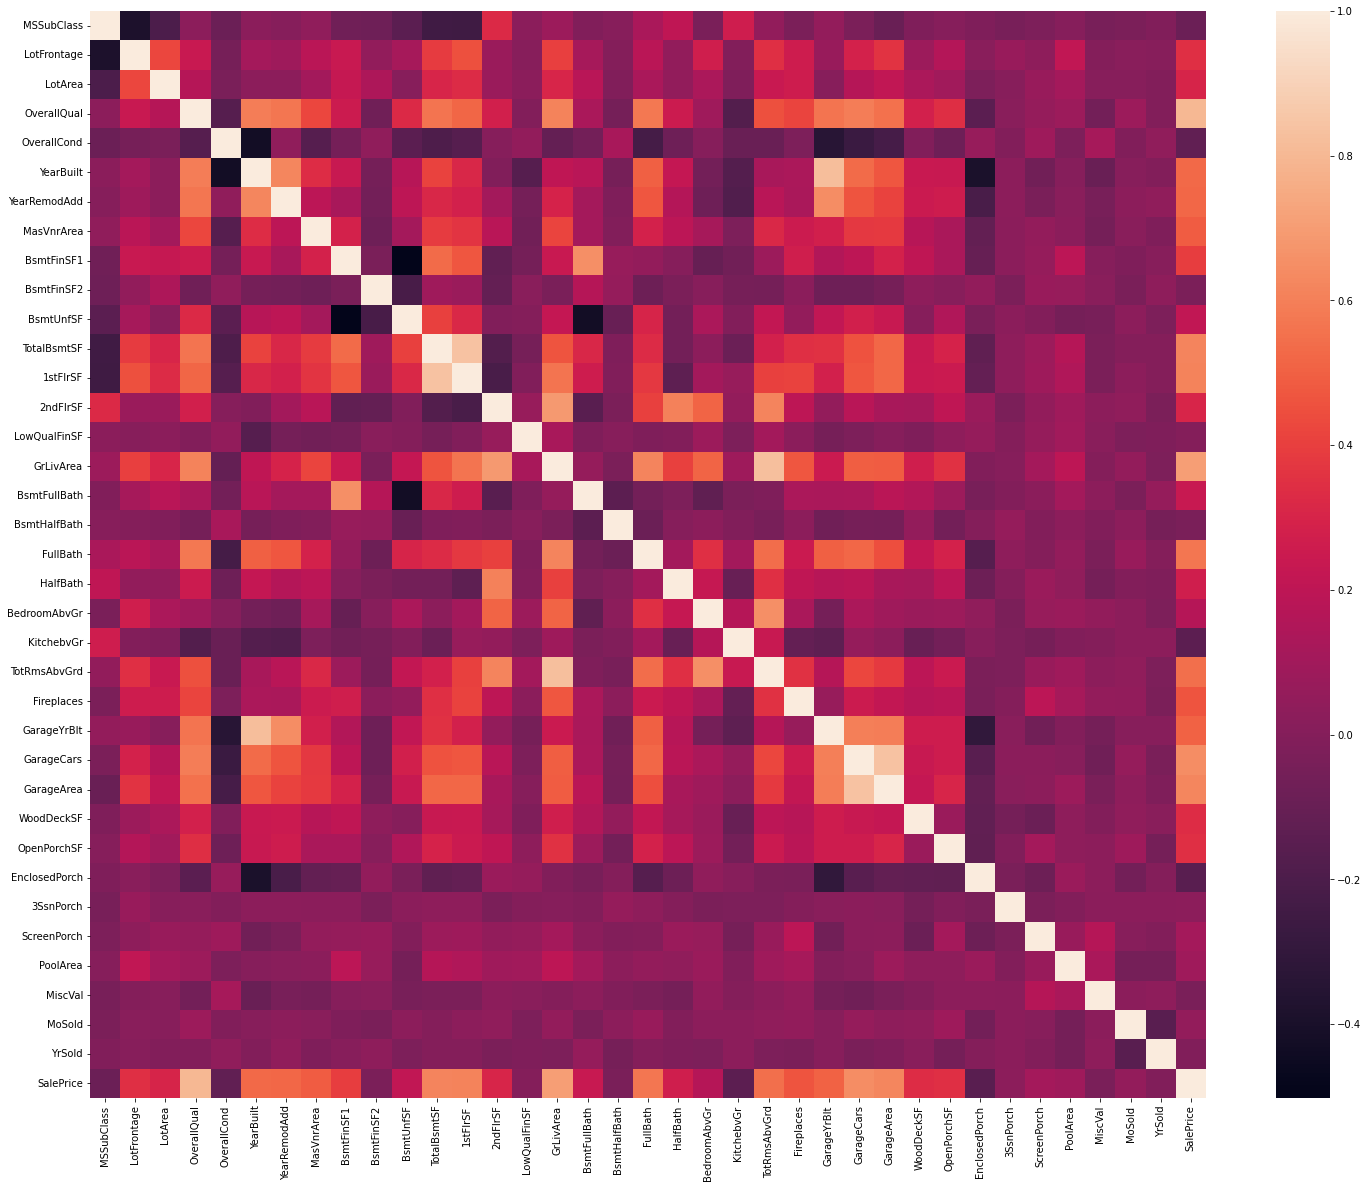

In [25]:
# correlation heatmap of everything
plt.figure(figsize=(25,20))
sns.heatmap(df_nd.corr())
plt.show()

In [26]:
#correlation matrix
corrData=df_nd.corr()['SalePrice'].sort_values(ascending=False)
corrData
#only correlated is SalePrice, OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt, YearRemodAdd, GarageYrBlt

SalePrice        1.000000
OverallQual      0.797881
GrLivArea        0.705154
GarageCars       0.647034
GarageArea       0.619330
TotalBsmtSF      0.615612
1stFlrSF         0.607969
FullBath         0.566627
TotRmsAbvGrd     0.547067
YearBuilt        0.525394
YearRemodAdd     0.521253
GarageYrBlt      0.504753
MasVnrArea       0.488658
Fireplaces       0.461873
BsmtFinSF1       0.390301
LotFrontage      0.344270
OpenPorchSF      0.343354
WoodDeckSF       0.336855
2ndFlrSF         0.306879
LotArea          0.299962
HalfBath         0.268560
BsmtFullBath     0.236737
BsmtUnfSF        0.213129
BedroomAbvGr     0.166814
ScreenPorch      0.110427
PoolArea         0.092488
MoSold           0.051568
3SsnPorch        0.030777
LowQualFinSF    -0.001482
YrSold          -0.011869
BsmtFinSF2      -0.028021
MiscVal         -0.036041
BsmtHalfBath    -0.036513
MSSubClass      -0.088032
OverallCond     -0.124391
KitchebvGr      -0.140497
EnclosedPorch   -0.154843
Name: SalePrice, dtype: float64

In [27]:
# showing whatever columns with a correlation lower than .5
columnsDropped=corrData[corrData<.5].index
columnsDropped

Index(['MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage', 'OpenPorchSF',
       'WoodDeckSF', '2ndFlrSF', 'LotArea', 'HalfBath', 'BsmtFullBath',
       'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch', 'PoolArea', 'MoSold',
       '3SsnPorch', 'LowQualFinSF', 'YrSold', 'BsmtFinSF2', 'MiscVal',
       'BsmtHalfBath', 'MSSubClass', 'OverallCond', 'KitchebvGr',
       'EnclosedPorch'],
      dtype='object')

In [28]:
# dropping whatever columns with a correlation lower than .5
df_nd2 = df_num.drop(columns=columnsDropped)

In [29]:
# dropping the id column because no need
df_nd2.drop('Id', axis=1, inplace=True)

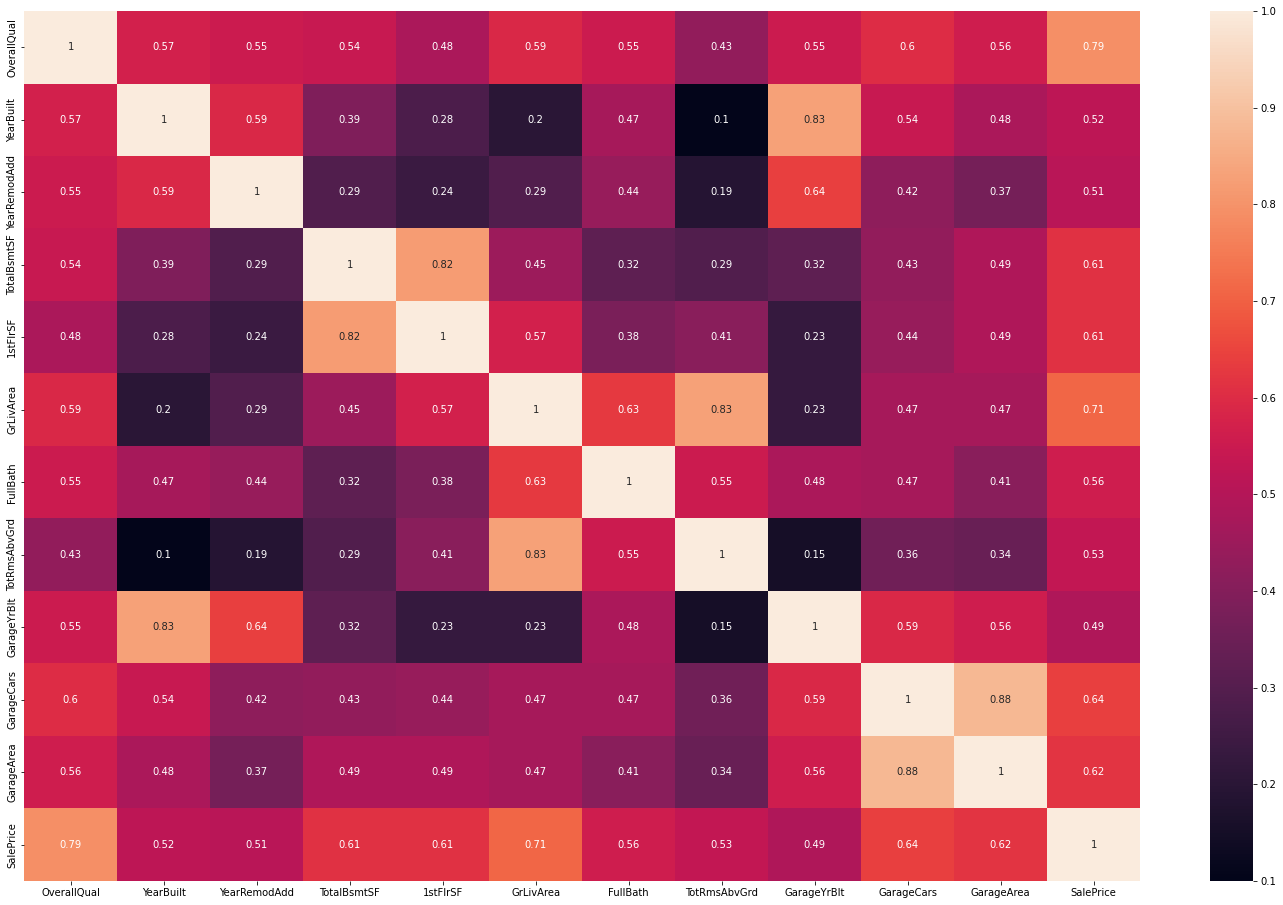

In [30]:
# heatmap of whatever columns with a corr score > 0.5
plt.figure(figsize=(25,16))
sns.heatmap(df_nd2.corr().round(2), annot=True)
plt.show()

In [31]:
#dropped YearRemodAdd, 1stFlrSF, TotRmsAbvGrd, GarageArea, GarageYrBlt.
#OverallQual is highly correlated to SalePrice
#GrLivArea is highly correlated with TotRmsAbvGrd, which means I can drop one of the variables. I dropped TotRmsAbvGrd because GrLivArea is more correlated with SalePrice.
#GarageCars and GarageArea are highly correlated with each other. I dropped GarageArea because GarageCars is more correlated with SalePrice.
#TotalBsmtSF is highly correlated with 1stFlrSF, so I dropped 1stFlrSF.

#Only categorical variables left are OverallQual, GrLivArea, GarageCars, TotalBsmtSF, FullBath, YearBuilt.
df_nd3=df_nd2.drop(['YearRemodAdd', '1stFlrSF', 'TotRmsAbvGrd','GarageArea', 'GarageYrBlt'], axis = 1)
df_nd3.head()

OverallQual  YearBuilt  TotalBsmtSF  GrLivArea  FullBath  GarageCars  \
0            7       2003          856       1710         2           2   
1            6       1976         1262       1262         2           2   
2            7       2001          920       1786         2           2   
3            7       1915          756       1717         1           3   
4            8       2000         1145       2198         2           3   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

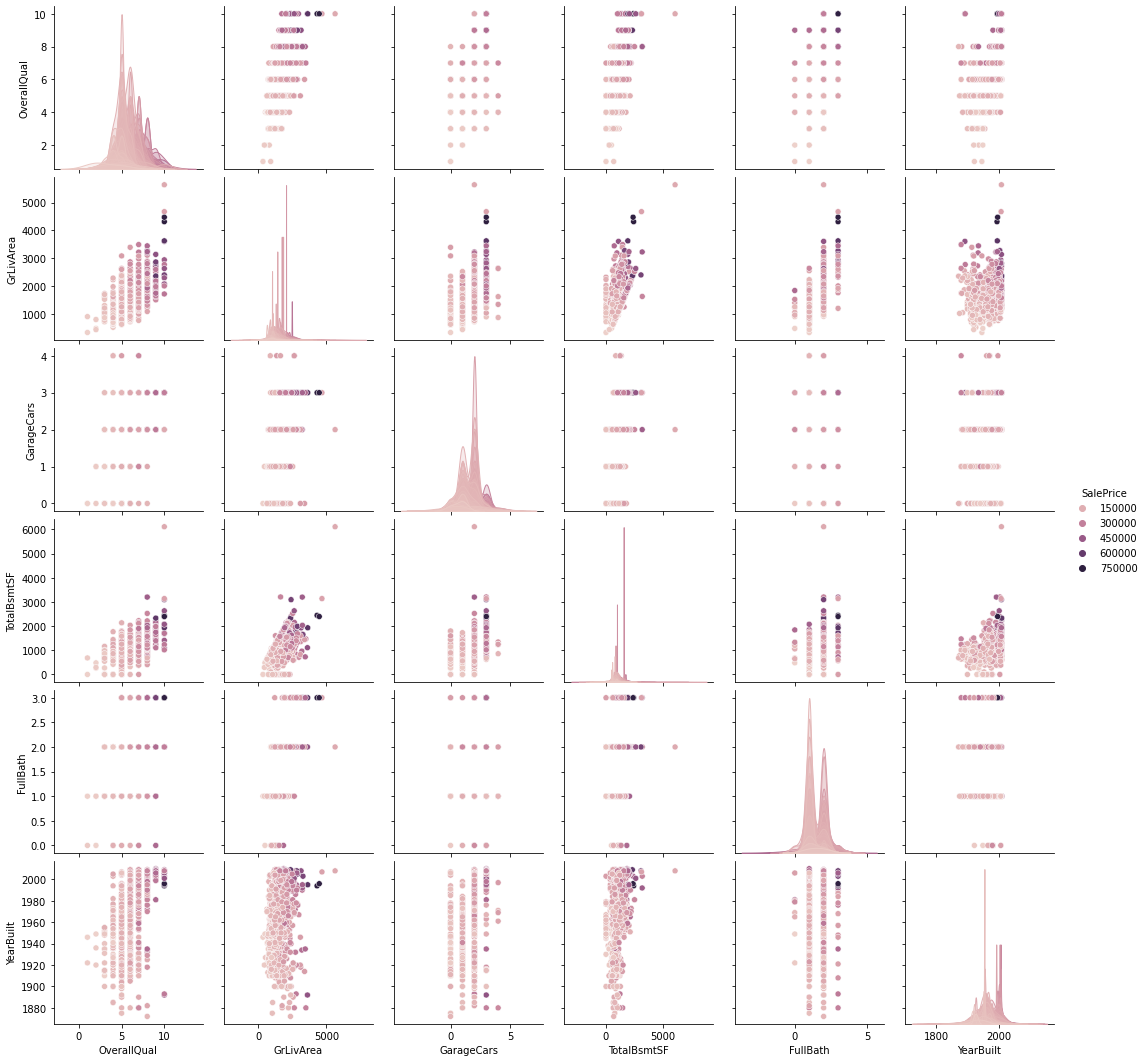

In [32]:
num = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_nd3[num],hue="SalePrice")
plt.show()

### Generate a separate dataset for categorical variables

In [33]:
# select only categoricals
df_cat=df.select_dtypes(include=['object'])
df_cat.head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
1      Veenker      Feedr  ...     Attchd          RFn         TA         TA   
2      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
3      Crawfor       Norm  ...     Detchd          Unf         TA         TA   
4      NoRidge       Norm  ...     Attchd          RFn         TA         TA   

  PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  
0          Y    NaN   NaN         NaN       WD        Normal  
1          Y    NaN   NaN         NaN       WD        Normal  
2          Y    NaN   NaN         NaN       WD        Normal  
3          Y    NaN   NaN         NaN       WD       Abnorml  
4          Y    NaN   NaN         NaN       WD        Normal  

[5 rows x 43 columns]

### EDA of categorical variables

In [34]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

In [35]:
# missing categorical data
df_cat.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
GarageCond         81
GarageQual         81
GarageFinish       81
GarageType         81
BsmtFinType2       38
BsmtExposure       38
BsmtFinType1       37
BsmtQual           37
BsmtCond           37
MasVnrType          8
Electrical          1
Condition2          0
Condition1          0
Neighborhood        0
LandSlope           0
BldgType            0
LandContour         0
LotConfig           0
Utilities           0
RoofStyle           0
LotShape            0
Street              0
HouseStyle          0
SaleCondition       0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
ExterQual           0
ExterCond           0
Foundation          0
SaleType            0
Heating             0
HeatingQC           0
CentralAir          0
KitchenQual         0
Functiol            0
PavedDrive          0
MSZoning            0
dtype: int64

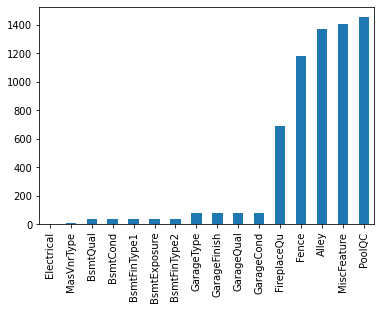

In [36]:
#plotting the missing data. 5 have over 50% of data missing
missing = df_cat.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()
plt.show()

In [37]:
# drop missing data
df_cat2 = df_cat.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], axis=1)

In [38]:
# check if dropped
df_cat2.isnull().sum(axis=0).sort_values(ascending=False)

GarageCond       81
GarageQual       81
GarageFinish     81
GarageType       81
BsmtFinType2     38
BsmtExposure     38
BsmtCond         37
BsmtQual         37
BsmtFinType1     37
MasVnrType        8
Electrical        1
SaleCondition     0
BldgType          0
Condition2        0
Condition1        0
Neighborhood      0
LandSlope         0
RoofStyle         0
LotConfig         0
Utilities         0
LandContour       0
LotShape          0
Street            0
HouseStyle        0
ExterCond         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
ExterQual         0
SaleType          0
Foundation        0
Heating           0
HeatingQC         0
CentralAir        0
KitchenQual       0
Functiol          0
PavedDrive        0
MSZoning          0
dtype: int64

In [39]:
df_cat2.dropna(inplace=True)
df_cat2.isnull().sum(axis=0)

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functiol         0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [40]:
# add SalePrice to the df_cat2
df_cat2['SalePrice'] = df.loc[df_cat2.index, 'SalePrice'].copy()
df_cat2.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... KitchenQual Functiol GarageType  \
0      CollgCr       Norm       Norm  ...          Gd      Typ     Attchd   
1      Veenker      Feedr       Norm  ...          TA      Typ     Attchd   
2      CollgCr       Norm       Norm  ...          Gd      Typ     Attchd   
3      Crawfor       Norm       Norm  ...          Gd      Typ     Detchd   
4      NoRidge       Norm       Norm  ...          Gd      Typ     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive SaleType SaleCondition  \
0          RFn         TA         TA          Y       WD        Normal   
1          RFn         TA         TA          Y       WD        Normal   
2          RFn         TA         TA          Y       WD        Normal   
3          Unf         TA         TA          Y       WD       Abnorml   
4          RFn         TA         TA          Y       WD        Normal   

  SalePrice  
0    208500  
1    181500  
2    223500  
3    140000  
4    250000  

[5 rows x 39 columns]

In [41]:
#how many rows needed for subplots
r=np.ceil(df_cat2.shape[1]/2).astype(int)
r

20

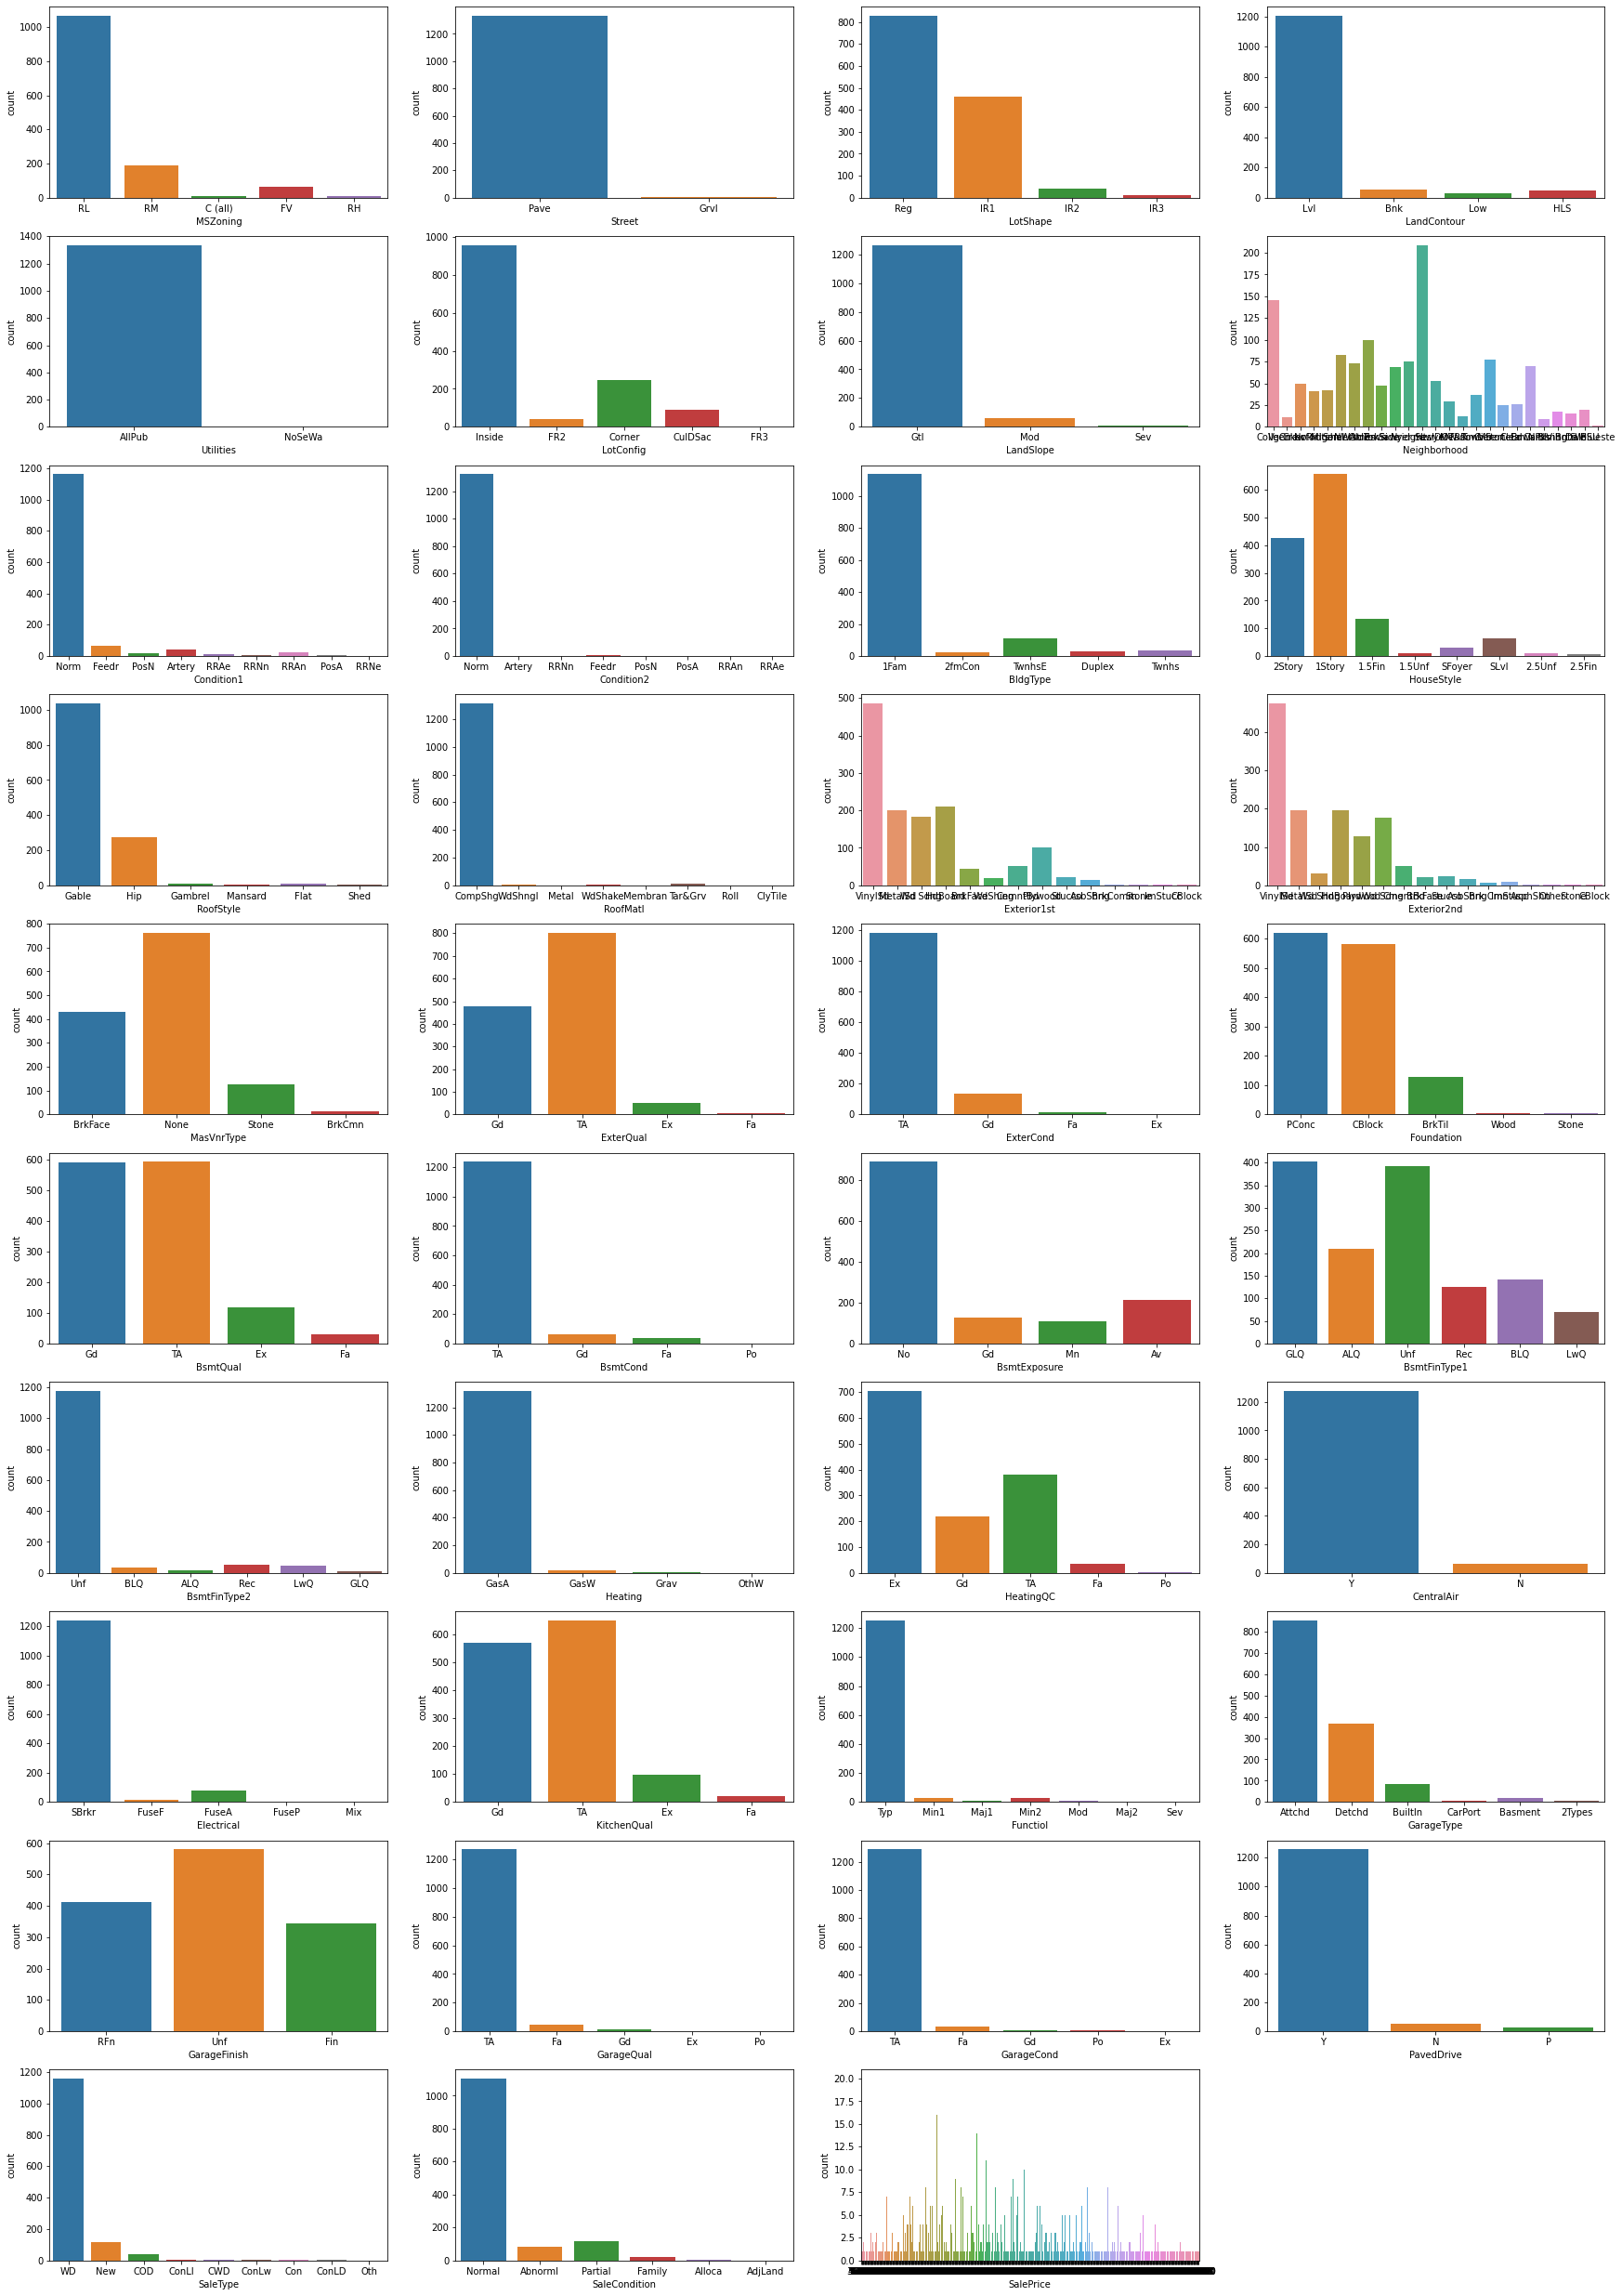

In [42]:
#bivariate analysis countplot for the categorical variables
plt.figure(figsize=(30,90))
for i, j in enumerate (df_cat2):
    plt.subplot(r,4,i+1)
    sns.countplot(j,data=df_cat2)
plt.show()

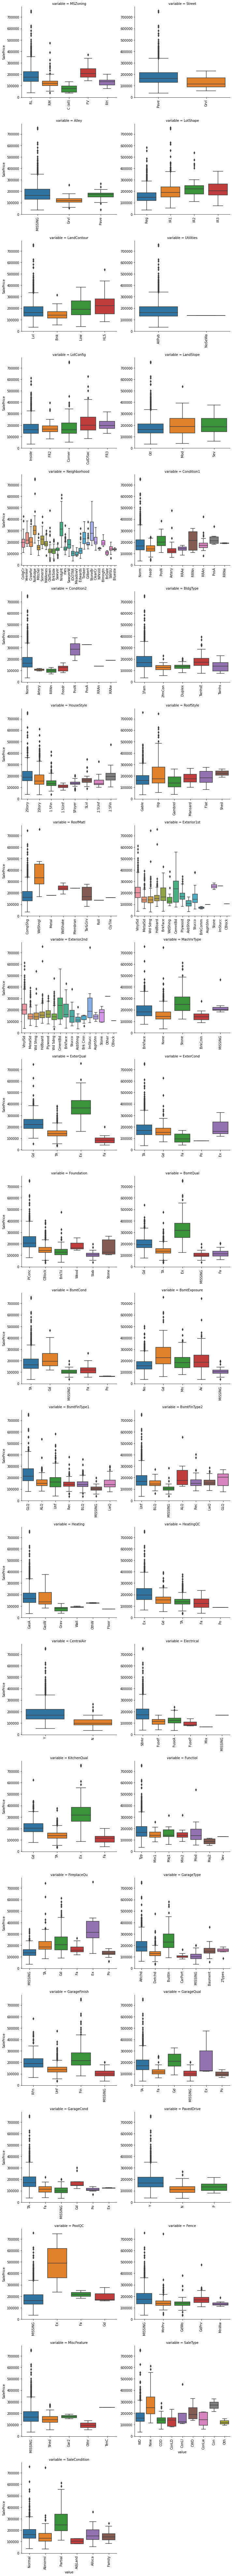

In [43]:
#check distribution of SalePrice with respect to variable values

qualitative = [f for f in df.columns if df.dtypes[f] == 'object']

for c in qualitative:
    df[c] = df[c].astype('category')
    if df[c].isnull().any():
        df[c] = df[c].cat.add_categories(['MISSING'])
        df[c] = df[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(df, id_vars=['SalePrice'], value_vars=qualitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

In [44]:
#finding significant variables using p-value and chi squared test

class ChiSquared:
#Function finding p-value for chi-squared test
    def __init__(self, df):
        self.df = df
        self.p = None #P-Value
        self.chi2 = None #Chi-square Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None

#Function prining results of p-value and chi-square test     
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="KEEP {0} for prediction. {0} passes".format(colX)
        else:
            result="DO NOT keep {0}.".format(colX)
        print(result)
        
#Function determining chi-square and p-value less than or equal to 0.05
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        self._print_chisquare_result(colX,alpha)

In [45]:
#Initializing ChiSquare Class
chi_results = ChiSquared(df_cat2)
#Perform Feature Selection
test_cols = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
             'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
             'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functiol', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition','SalePrice']
for var in test_cols:
    chi_results.TestIndependence(colX=var,colY="SalePrice" ) 

KEEP MSZoning for prediction. MSZoning passes
KEEP Street for prediction. Street passes
KEEP LotShape for prediction. LotShape passes
DO NOT keep LandContour.
DO NOT keep Utilities.
DO NOT keep LotConfig.
DO NOT keep LandSlope.
KEEP Neighborhood for prediction. Neighborhood passes
DO NOT keep Condition1.
KEEP Condition2 for prediction. Condition2 passes
DO NOT keep BldgType.
DO NOT keep HouseStyle.
DO NOT keep RoofStyle.
DO NOT keep RoofMatl.
DO NOT keep Exterior1st.
DO NOT keep Exterior2nd.
KEEP MasVnrType for prediction. MasVnrType passes
KEEP ExterQual for prediction. ExterQual passes
DO NOT keep ExterCond.
KEEP Foundation for prediction. Foundation passes
KEEP BsmtQual for prediction. BsmtQual passes
KEEP BsmtCond for prediction. BsmtCond passes
KEEP BsmtExposure for prediction. BsmtExposure passes
DO NOT keep BsmtFinType1.
DO NOT keep BsmtFinType2.
DO NOT keep Heating.
DO NOT keep HeatingQC.
KEEP CentralAir for prediction. CentralAir passes
KEEP Electrical for prediction. Electric

In [46]:
#from the chi squrared and pvalue test, all of these are significant:
'''Important variables: MSZoningStreet, LotShape, Neighborhood, Condition2, MasVnrType, ExterQual,
Foundation, BsmtQual, BsmtCond, BsmtExposure, CentralAir, Electrical, 
KitchenQual, GarageType, GarageFinish, GarageQual, SaleType, SaleCondition, and SalePrice'''

'Important variables: MSZoningStreet, LotShape, Neighborhood, Condition2, MasVnrType, ExterQual,\nFoundation, BsmtQual, BsmtCond, BsmtExposure, CentralAir, Electrical, \nKitchenQual, GarageType, GarageFinish, GarageQual, SaleType, SaleCondition, and SalePrice'

In [47]:
#Significant variabes
df_sigcat = df_cat2[['MSZoning','Street','LotShape','Neighborhood','Condition2','MasVnrType','ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','CentralAir',
                     'Electrical','KitchenQual','GarageType','GarageFinish','GarageQual','SaleType','SaleCondition','SalePrice']]

In [48]:
df_sigcat.head()

MSZoning Street LotShape Neighborhood Condition2 MasVnrType ExterQual  \
0       RL   Pave      Reg      CollgCr       Norm    BrkFace        Gd   
1       RL   Pave      Reg      Veenker       Norm       None        TA   
2       RL   Pave      IR1      CollgCr       Norm    BrkFace        Gd   
3       RL   Pave      IR1      Crawfor       Norm       None        TA   
4       RL   Pave      IR1      NoRidge       Norm    BrkFace        Gd   

  Foundation BsmtQual BsmtCond BsmtExposure CentralAir Electrical KitchenQual  \
0      PConc       Gd       TA           No          Y      SBrkr          Gd   
1     CBlock       Gd       TA           Gd          Y      SBrkr          TA   
2      PConc       Gd       TA           Mn          Y      SBrkr          Gd   
3     BrkTil       TA       Gd           No          Y      SBrkr          Gd   
4      PConc       Gd       TA           Av          Y      SBrkr          Gd   

  GarageType GarageFinish GarageQual SaleType SaleCondition  SalePrice  
0     Attchd          RFn         TA       WD        Normal     208500  
1     Attchd          RFn         TA       WD        Normal     181500  
2     Attchd          RFn         TA       WD        Normal     223500  
3     Detchd          Unf         TA       WD       Abnorml     140000  
4     Attchd          RFn         TA       WD        Normal     250000

##### Combine all significant categorical and numerical variables

In [49]:
#Combining significant categories and numericals
combined_signum = pd.merge(df_sigcat, df_num, how="outer", on=["SalePrice"])

In [50]:
combined_signum.head()

MSZoning Street LotShape Neighborhood Condition2 MasVnrType ExterQual  \
0       RL   Pave      Reg      CollgCr       Norm    BrkFace        Gd   
1       RL   Pave      Reg      Veenker       Norm       None        TA   
2       RL   Pave      IR1      CollgCr       Norm    BrkFace        Gd   
3       RL   Pave      IR1      CollgCr       Norm    BrkFace        Gd   
4       RL   Pave      Reg      BrkSide       Norm       None        TA   

  Foundation BsmtQual BsmtCond  ... GarageArea WoodDeckSF OpenPorchSF  \
0      PConc       Gd       TA  ...        548          0          61   
1     CBlock       Gd       TA  ...        460        298           0   
2      PConc       Gd       TA  ...        608          0          42   
3      PConc       Gd       TA  ...        528          0         312   
4     CBlock       TA       TA  ...        608          0          42   

  EnclosedPorch 3SsnPorch ScreenPorch PoolArea MiscVal MoSold  YrSold  
0             0         0           0        0       0      2    2008  
1             0         0           0        0       0      5    2007  
2             0         0           0        0       0      9    2008  
3             0         0           0        0       0      5    2009  
4             0         0           0        0       0      9    2008  

[5 rows x 57 columns]

In [51]:
combined_signum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6383 entries, 0 to 6382
Data columns (total 57 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       6336 non-null   object 
 1   Street         6336 non-null   object 
 2   LotShape       6336 non-null   object 
 3   Neighborhood   6336 non-null   object 
 4   Condition2     6336 non-null   object 
 5   MasVnrType     6336 non-null   object 
 6   ExterQual      6336 non-null   object 
 7   Foundation     6336 non-null   object 
 8   BsmtQual       6336 non-null   object 
 9   BsmtCond       6336 non-null   object 
 10  BsmtExposure   6336 non-null   object 
 11  CentralAir     6336 non-null   object 
 12  Electrical     6336 non-null   object 
 13  KitchenQual    6336 non-null   object 
 14  GarageType     6336 non-null   object 
 15  GarageFinish   6336 non-null   object 
 16  GarageQual     6336 non-null   object 
 17  SaleType       6336 non-null   object 
 18  SaleCond

In [52]:
df_sigcat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1338 non-null   object
 1   Street         1338 non-null   object
 2   LotShape       1338 non-null   object
 3   Neighborhood   1338 non-null   object
 4   Condition2     1338 non-null   object
 5   MasVnrType     1338 non-null   object
 6   ExterQual      1338 non-null   object
 7   Foundation     1338 non-null   object
 8   BsmtQual       1338 non-null   object
 9   BsmtCond       1338 non-null   object
 10  BsmtExposure   1338 non-null   object
 11  CentralAir     1338 non-null   object
 12  Electrical     1338 non-null   object
 13  KitchenQual    1338 non-null   object
 14  GarageType     1338 non-null   object
 15  GarageFinish   1338 non-null   object
 16  GarageQual     1338 non-null   object
 17  SaleType       1338 non-null   object
 18  SaleCondition  1338 non-null

### Plot box plot for the new dataset to find the variables with outliers

In [53]:
m=np.ceil(combined_signum.shape[1]/2).astype(int)
m

29

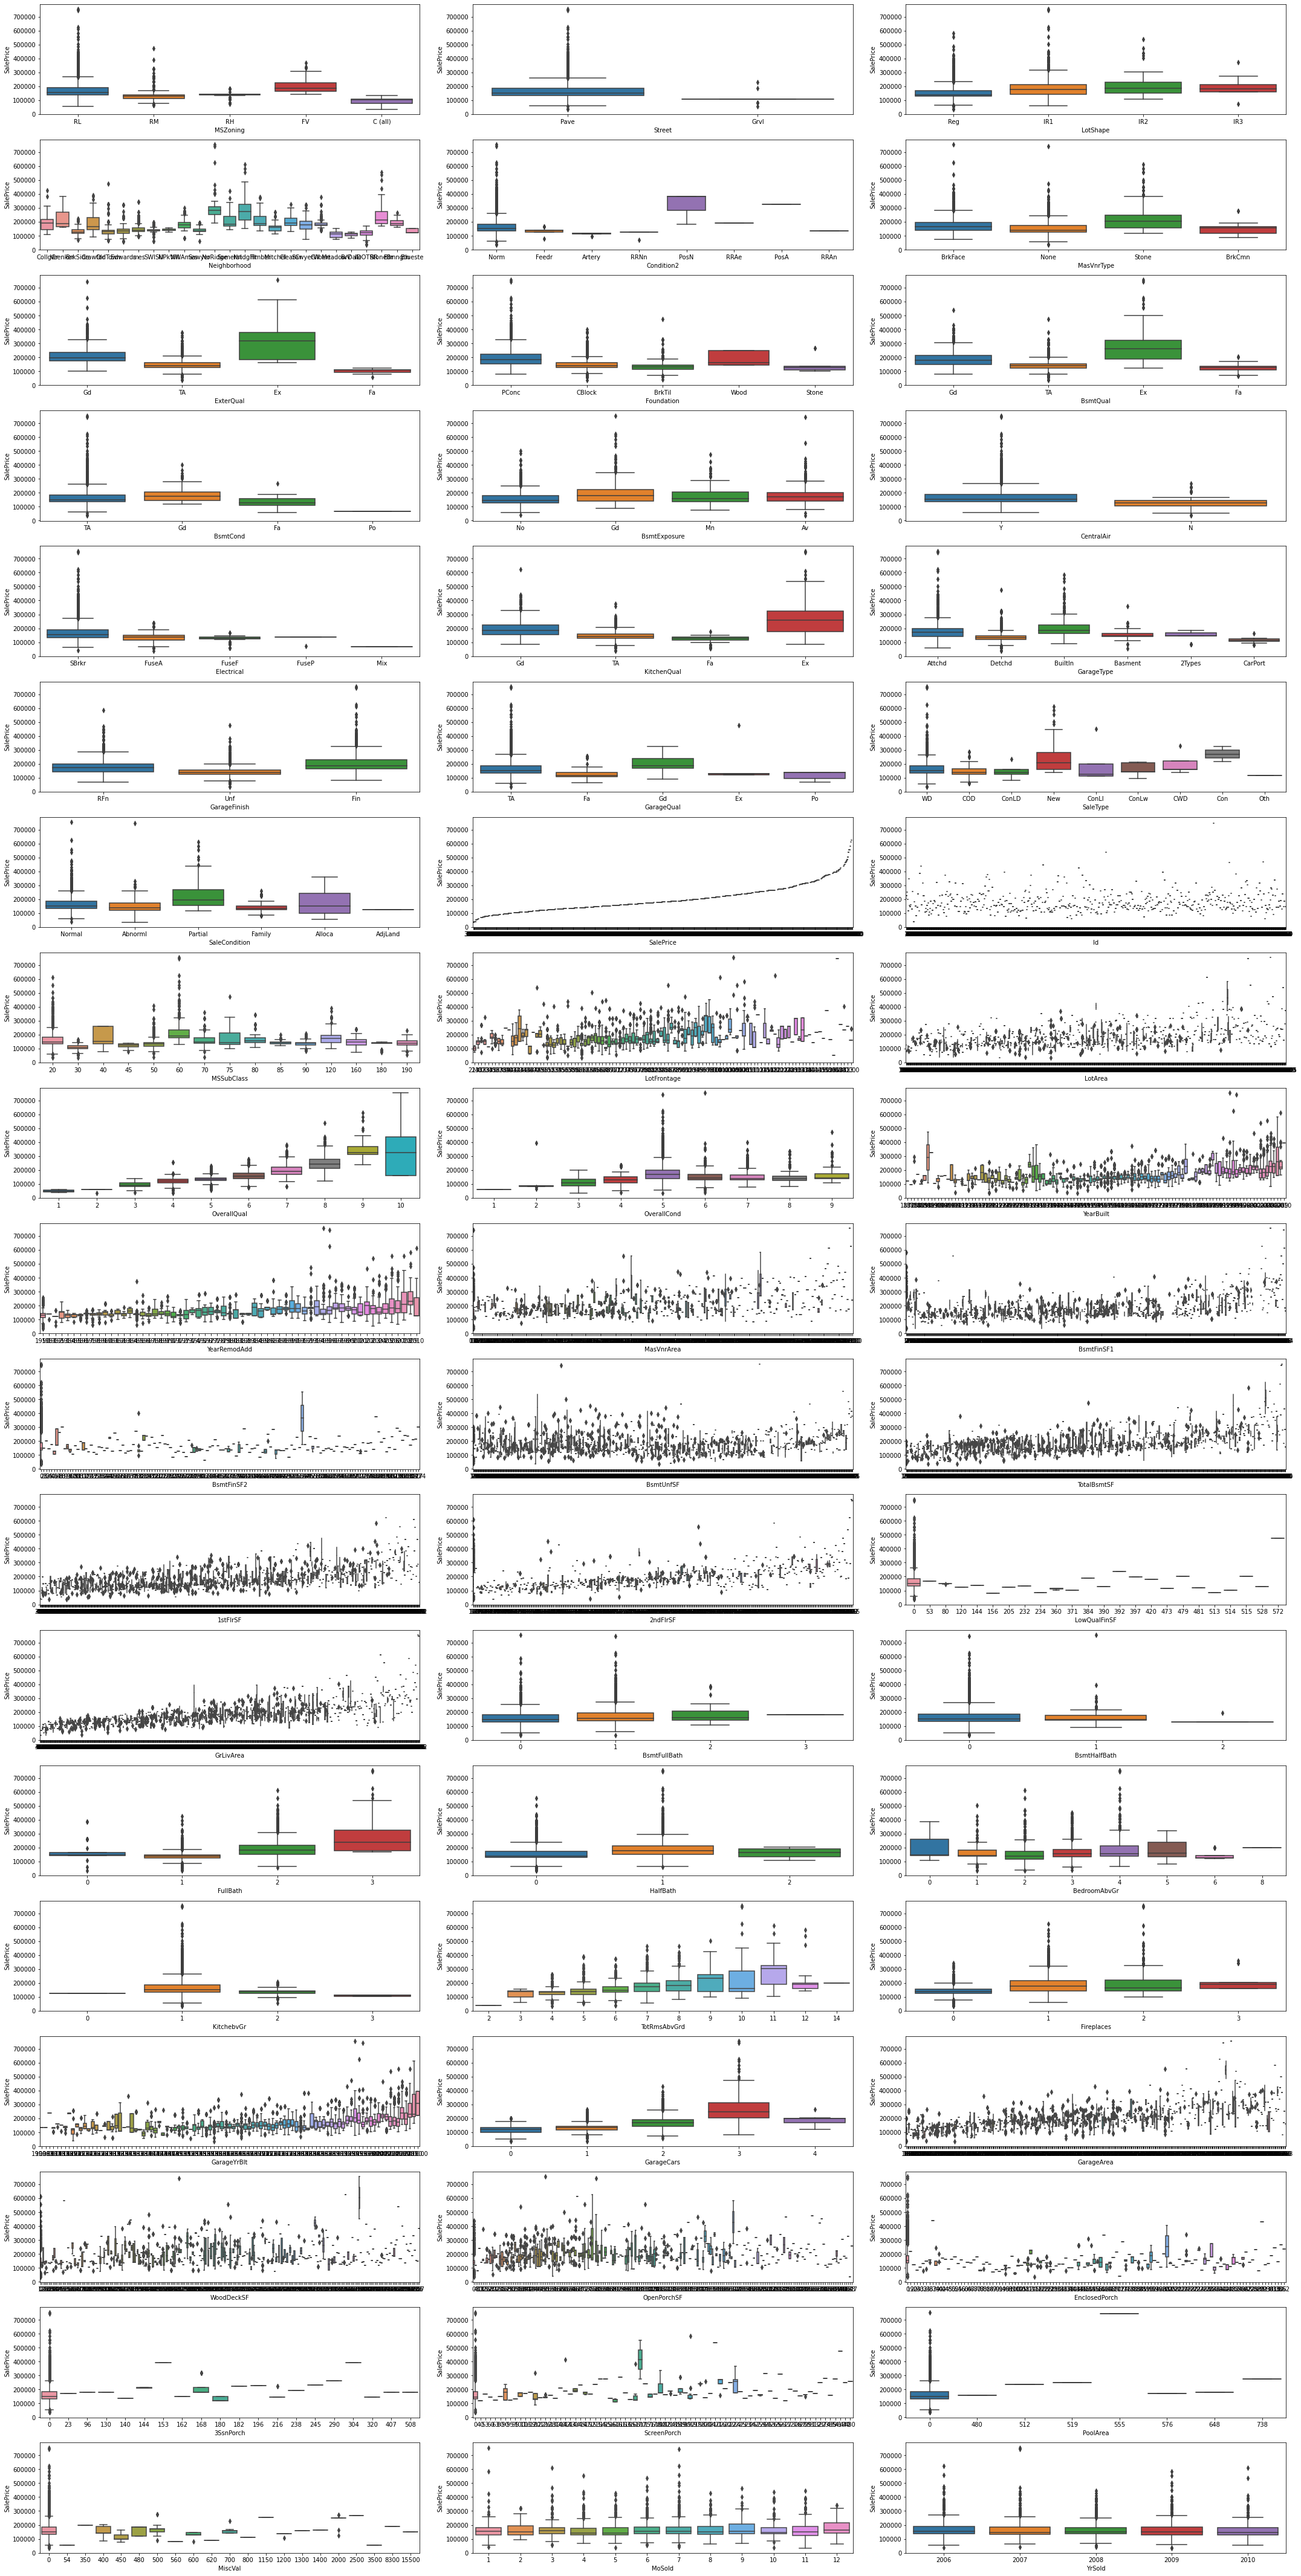

In [54]:
#Function to plot all independent categorical variables with SalePrice and count plot
plt.figure(figsize=(30,90))
for i, j in enumerate (combined_signum.columns):
    plt.subplot(m,3,i+1)
    sns.boxplot(j,'SalePrice',data=combined_signum)
    plt.tight_layout()
plt.show()

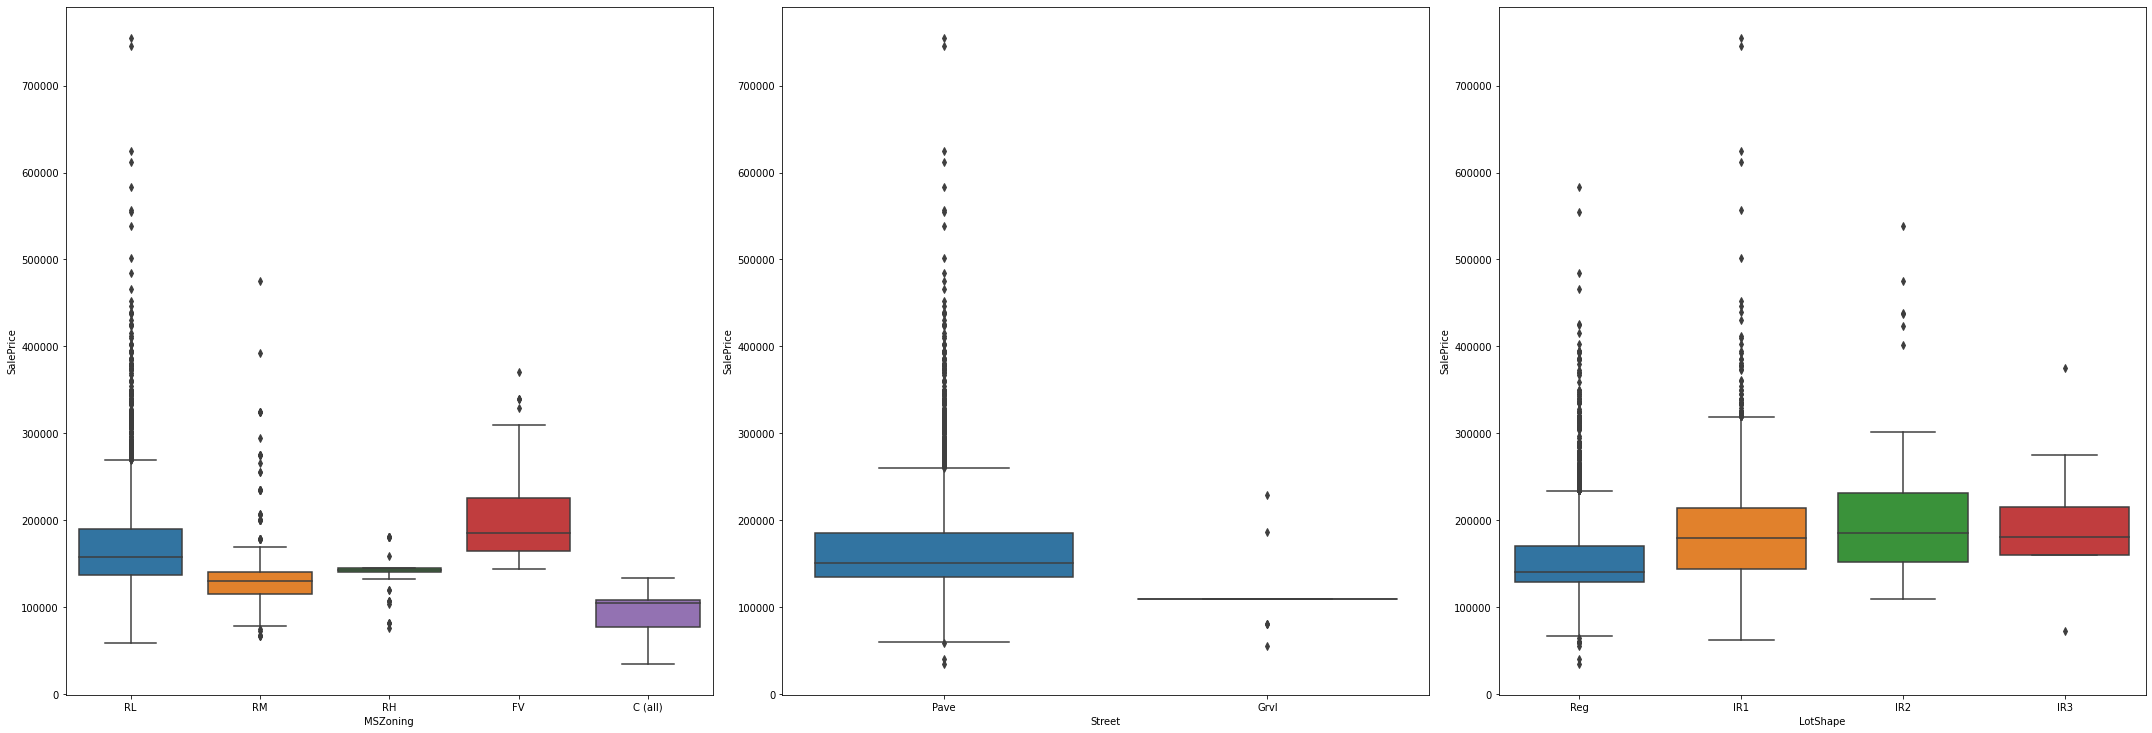

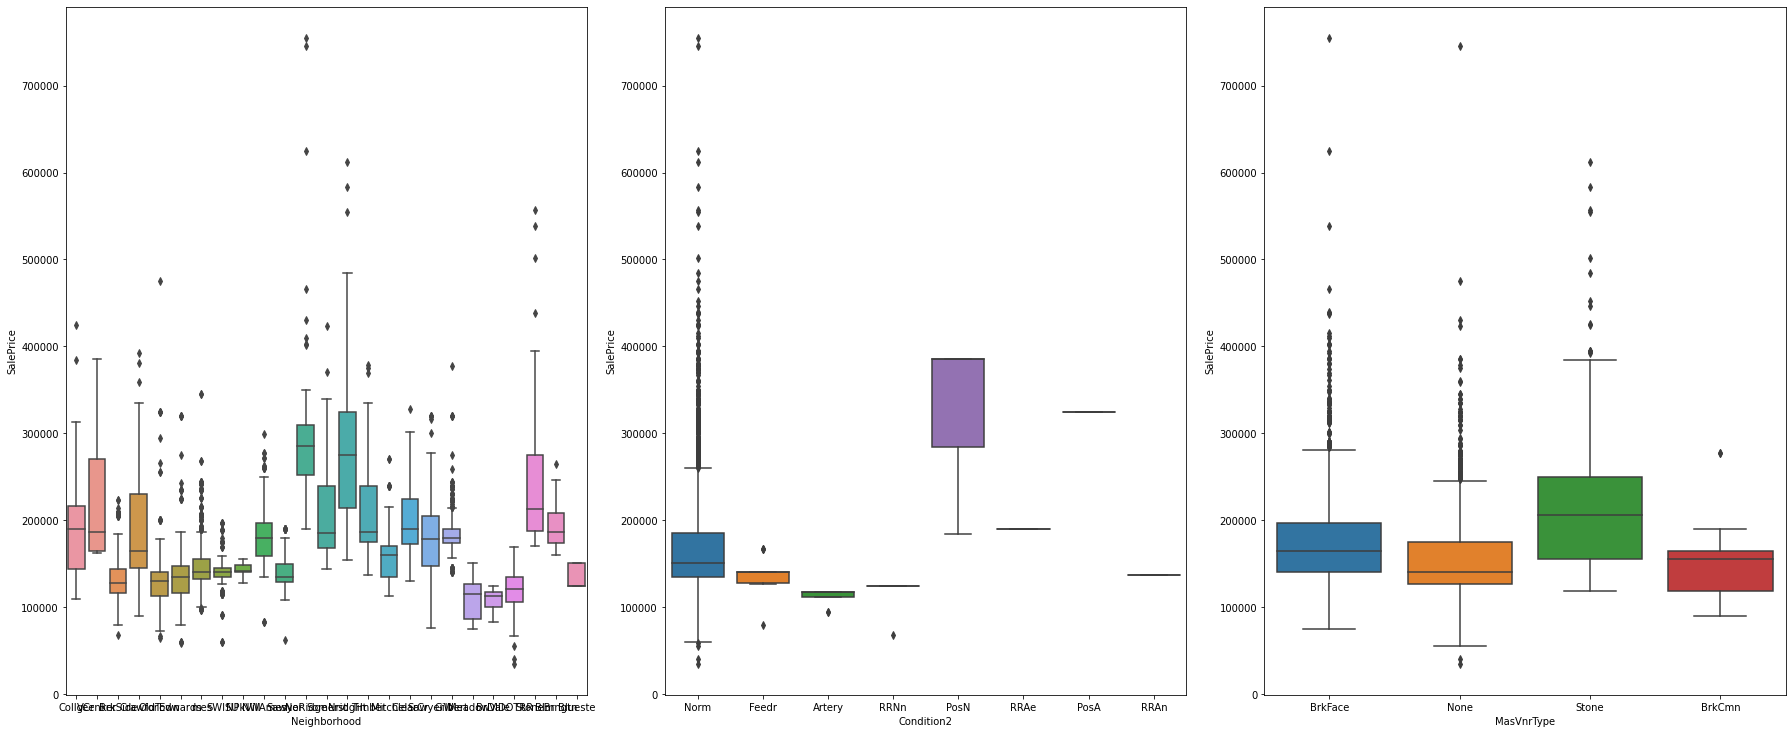

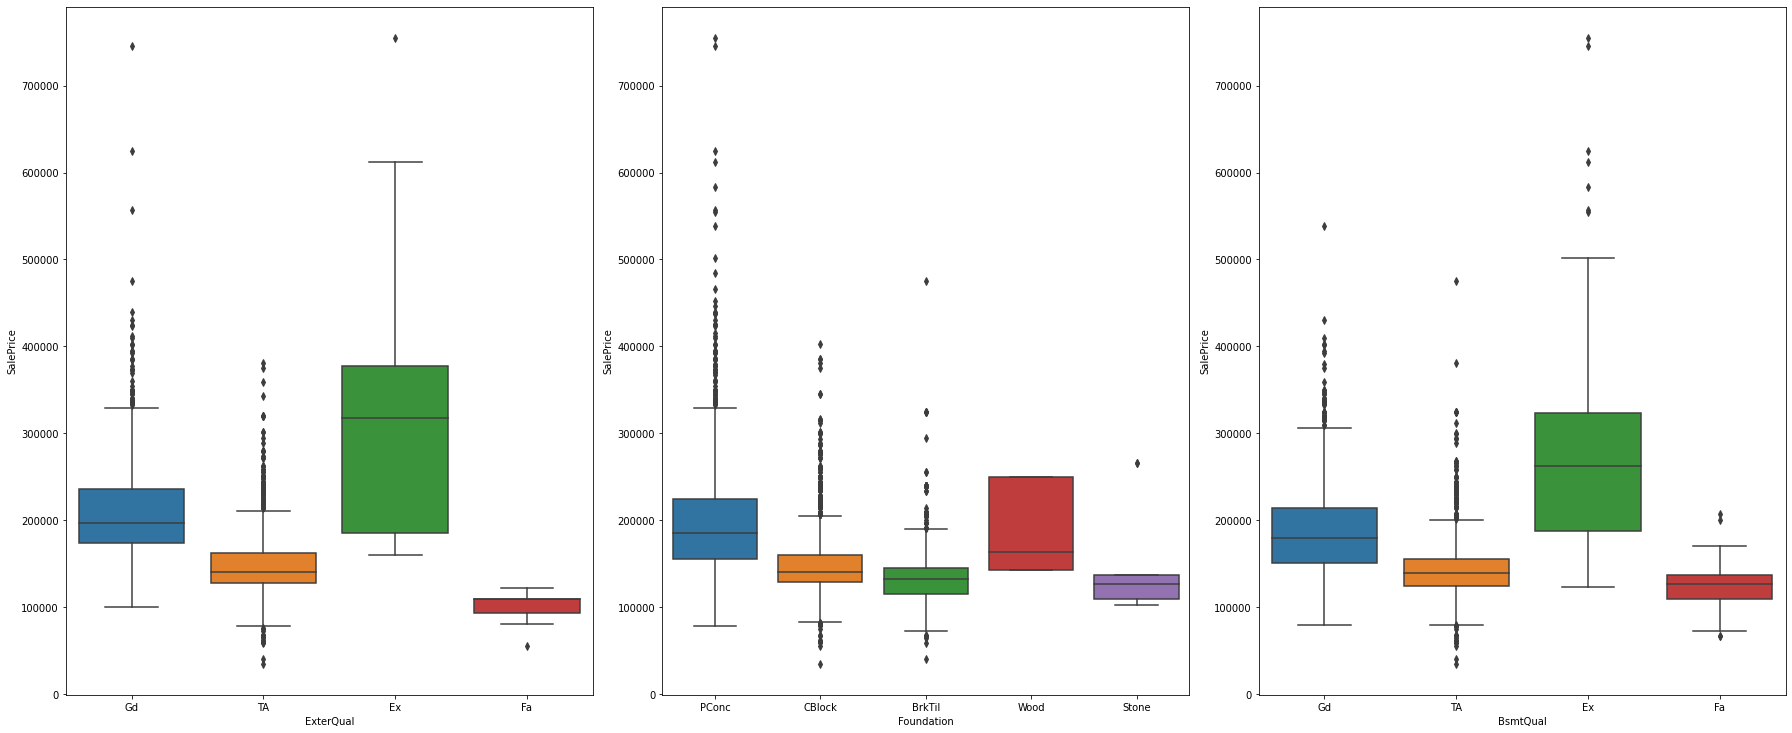

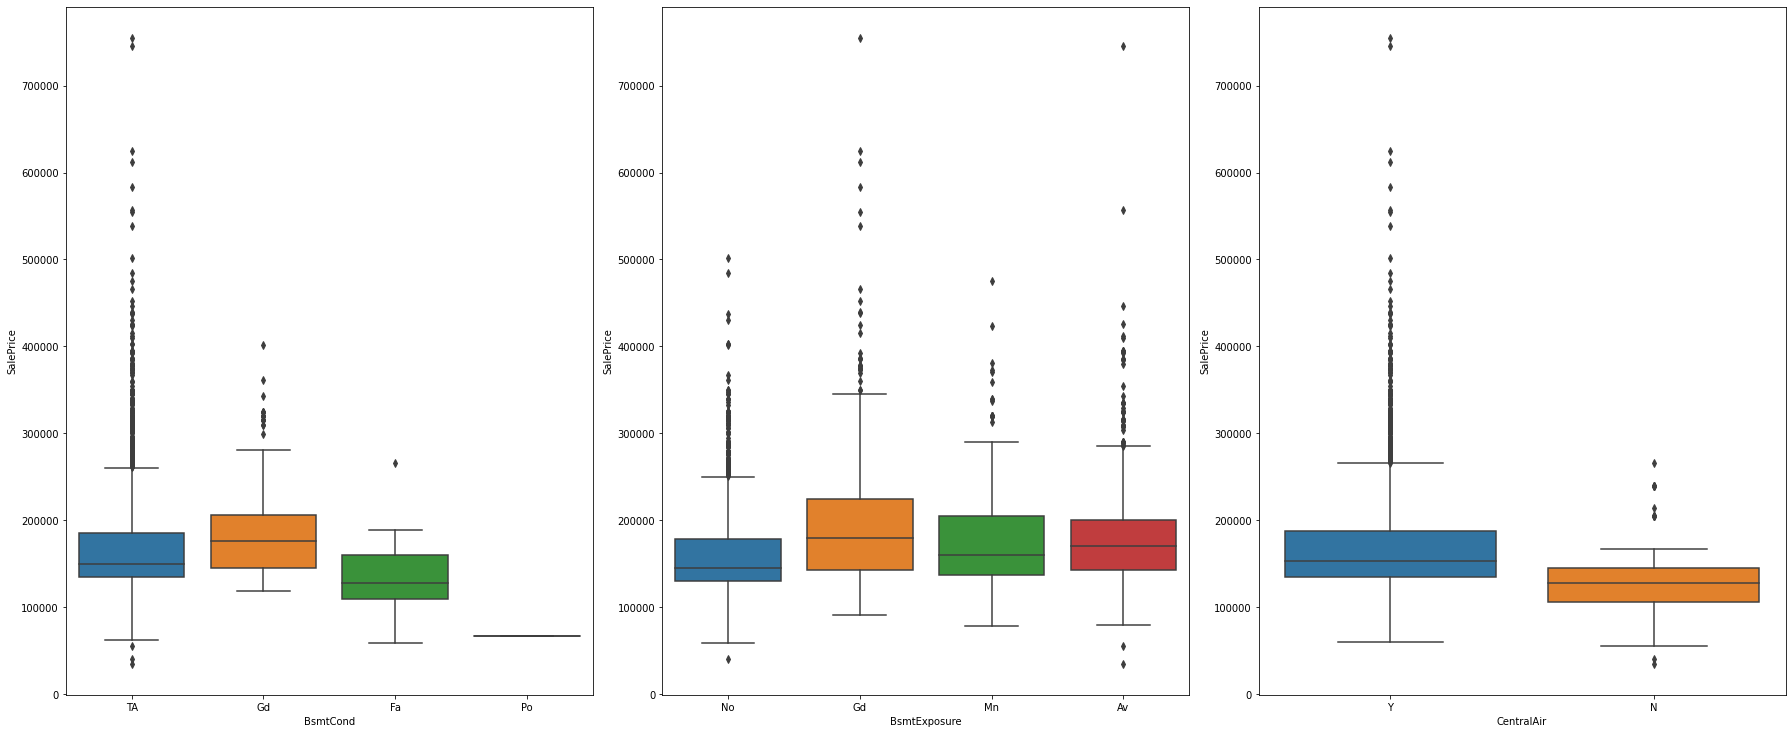

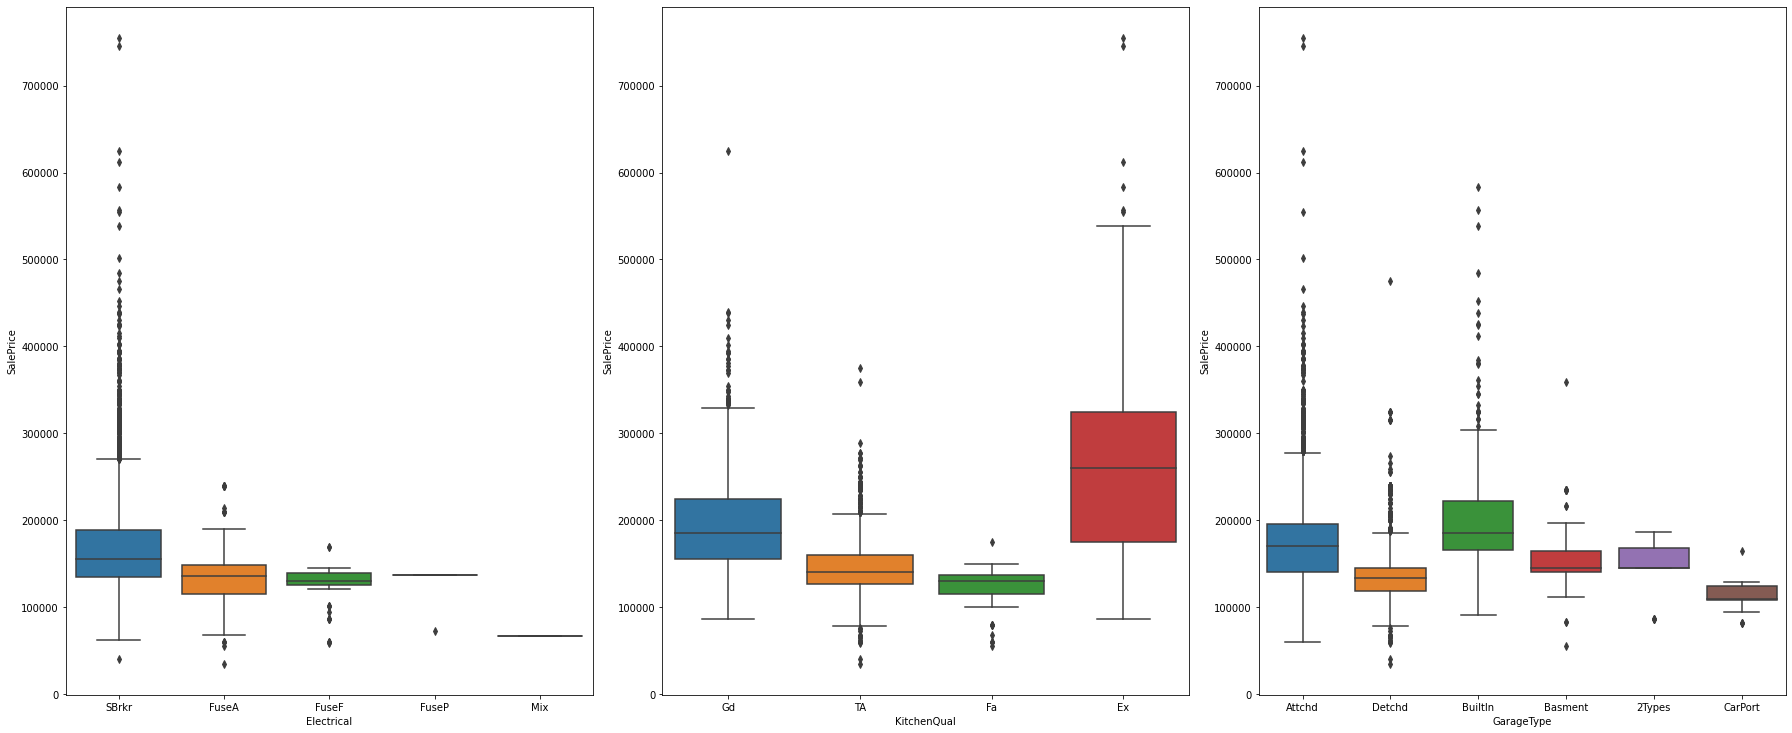

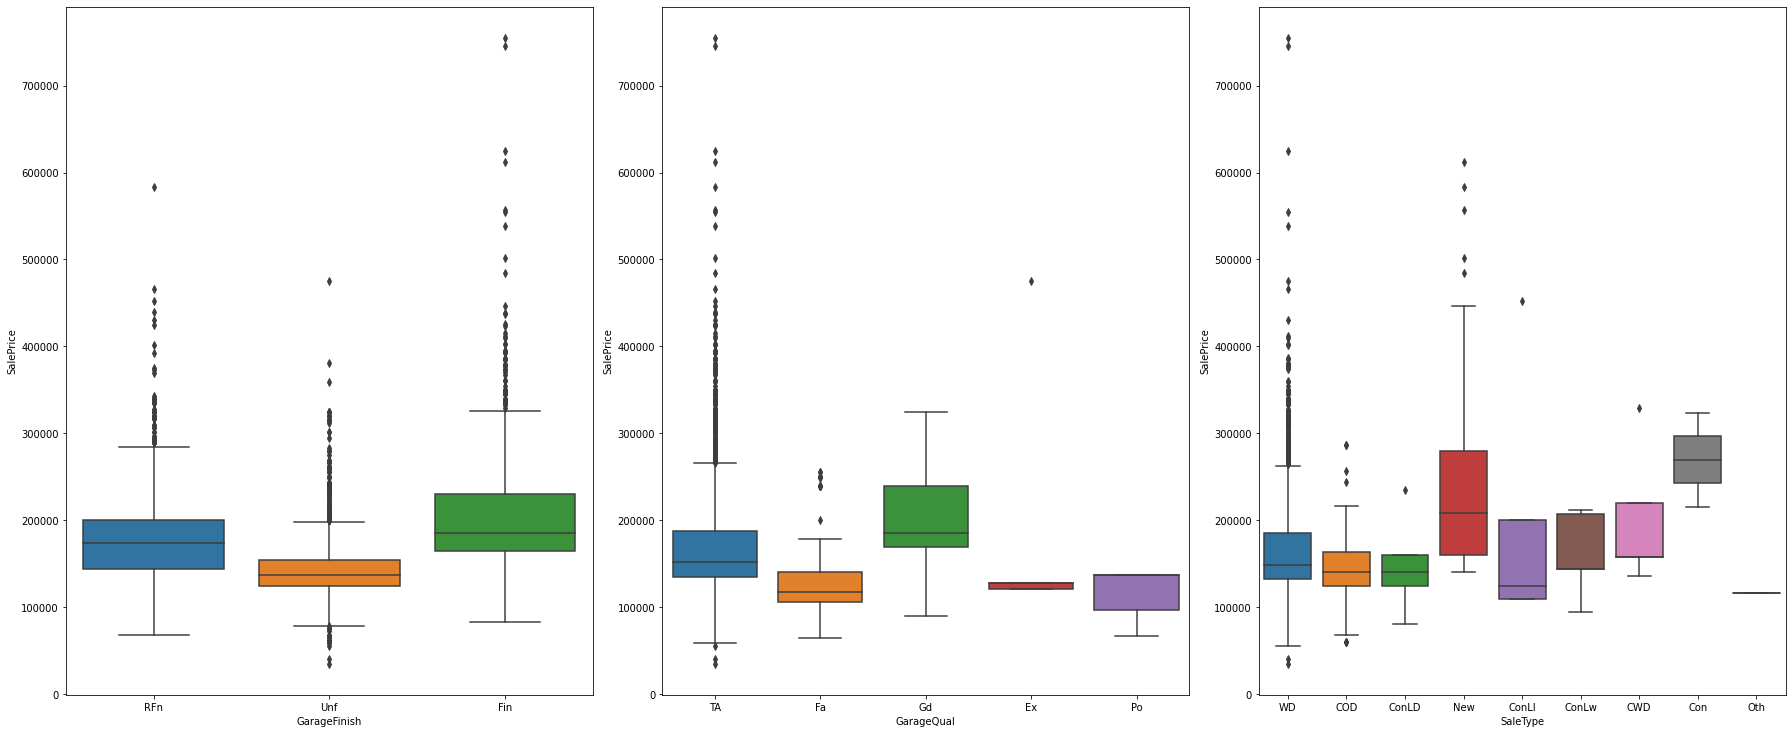

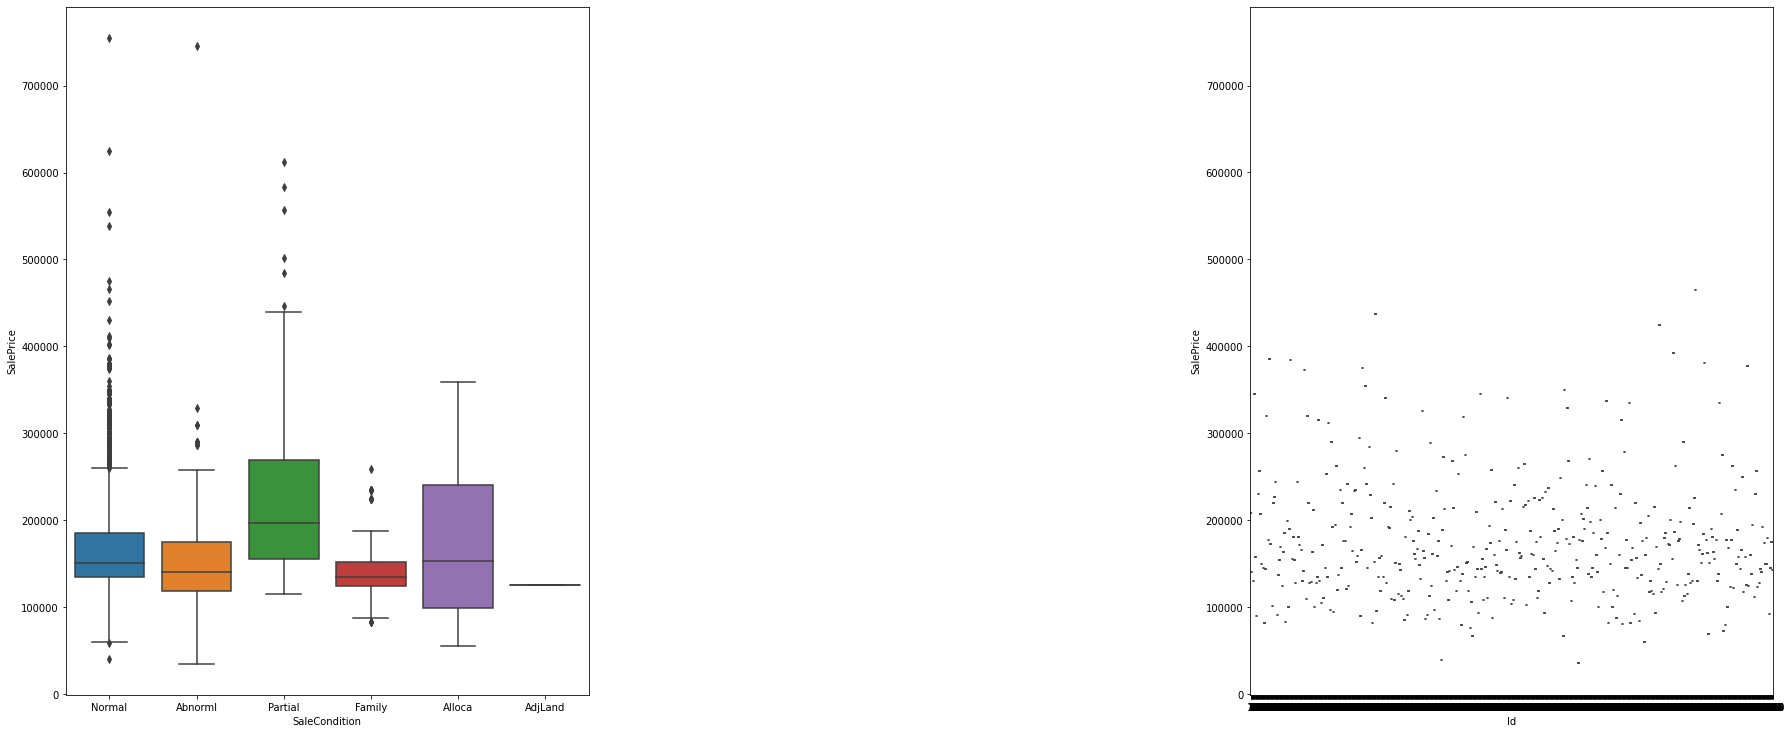

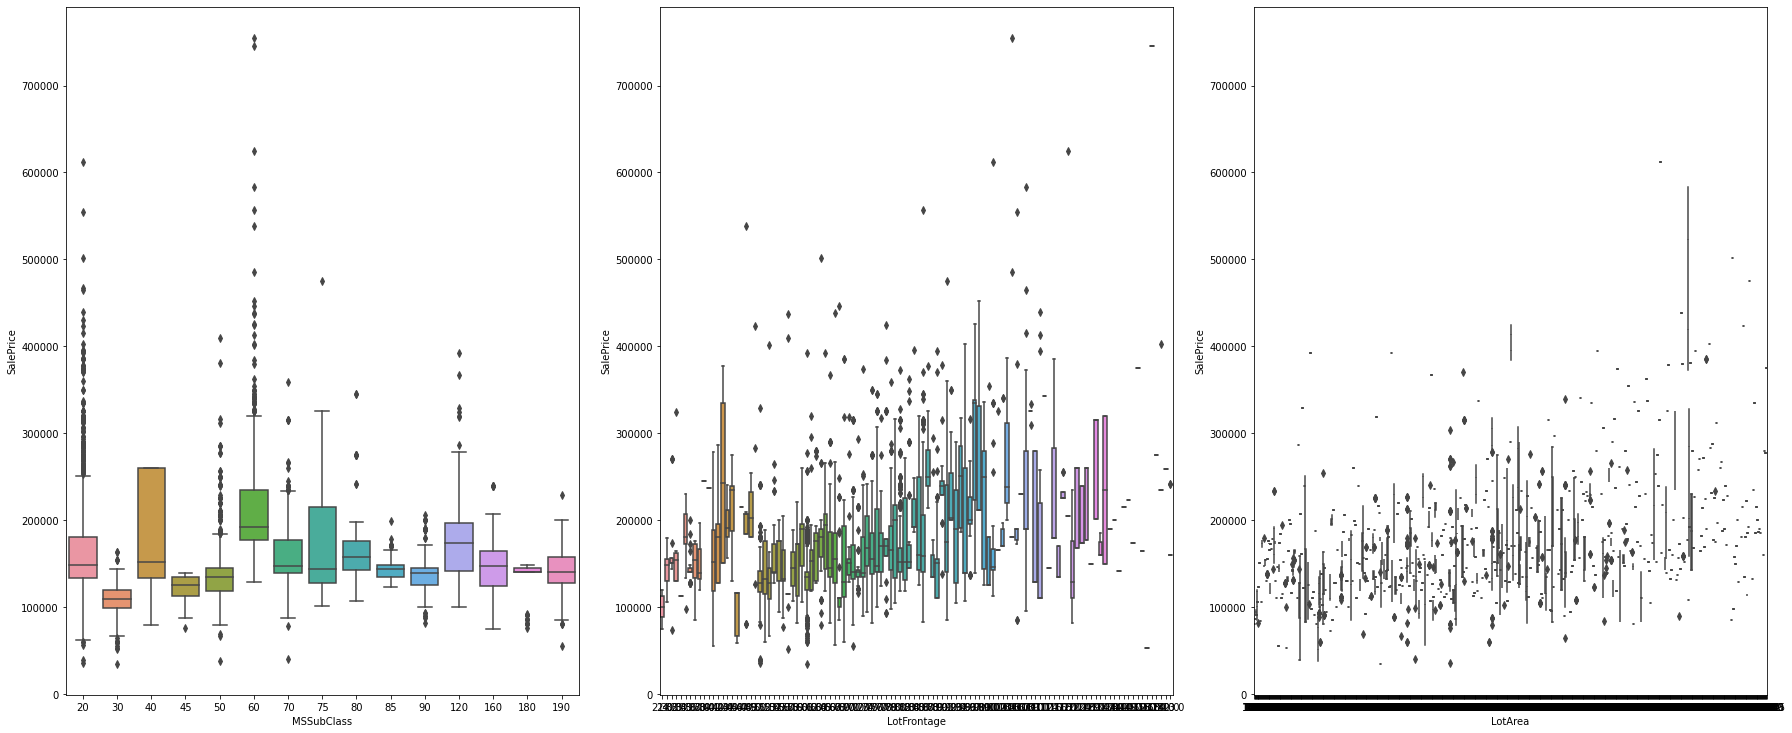

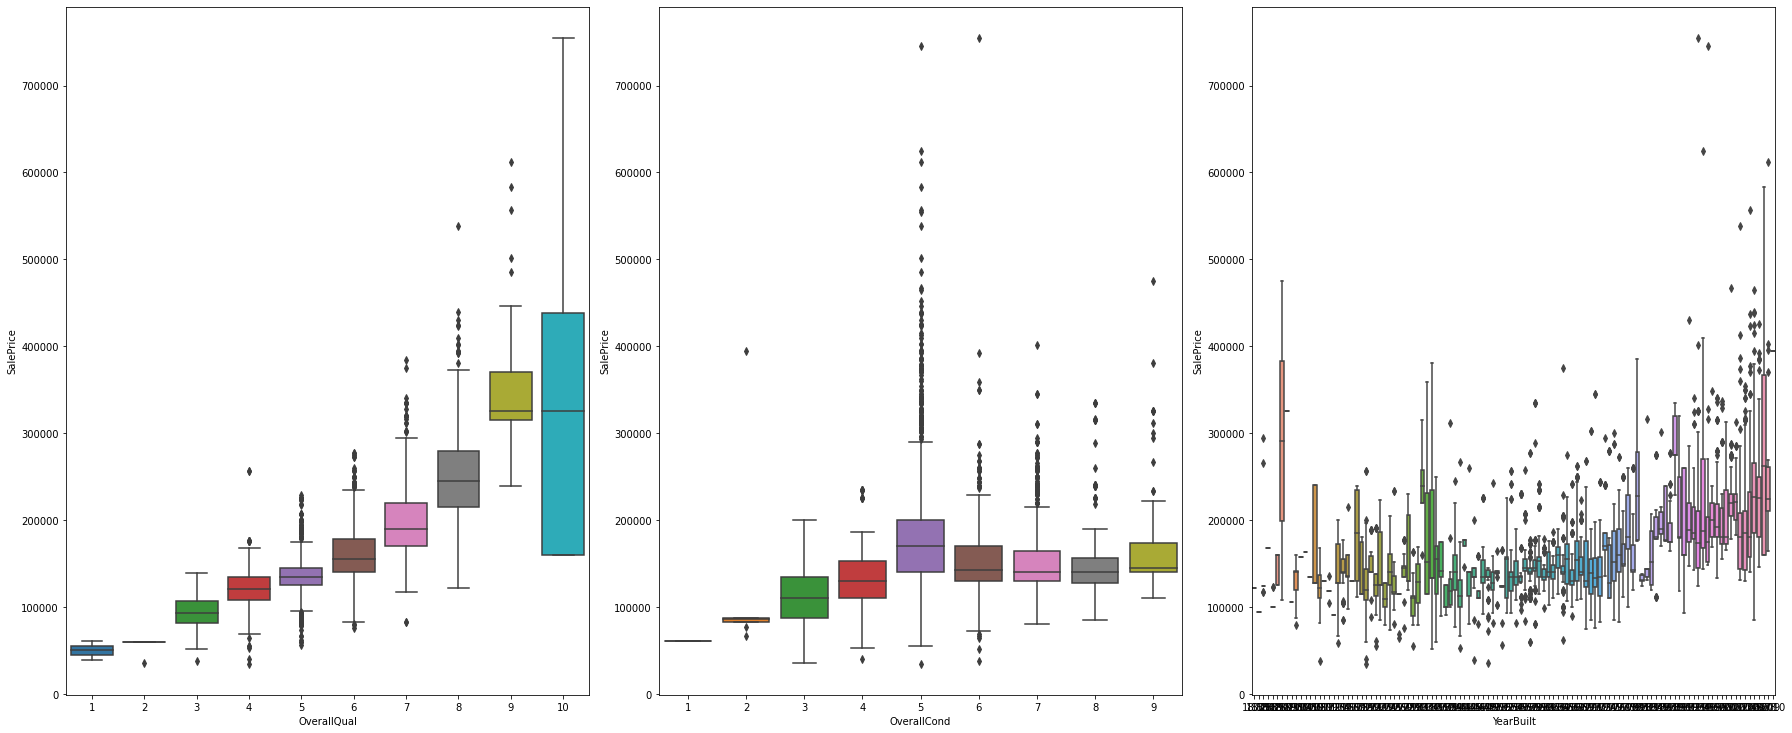

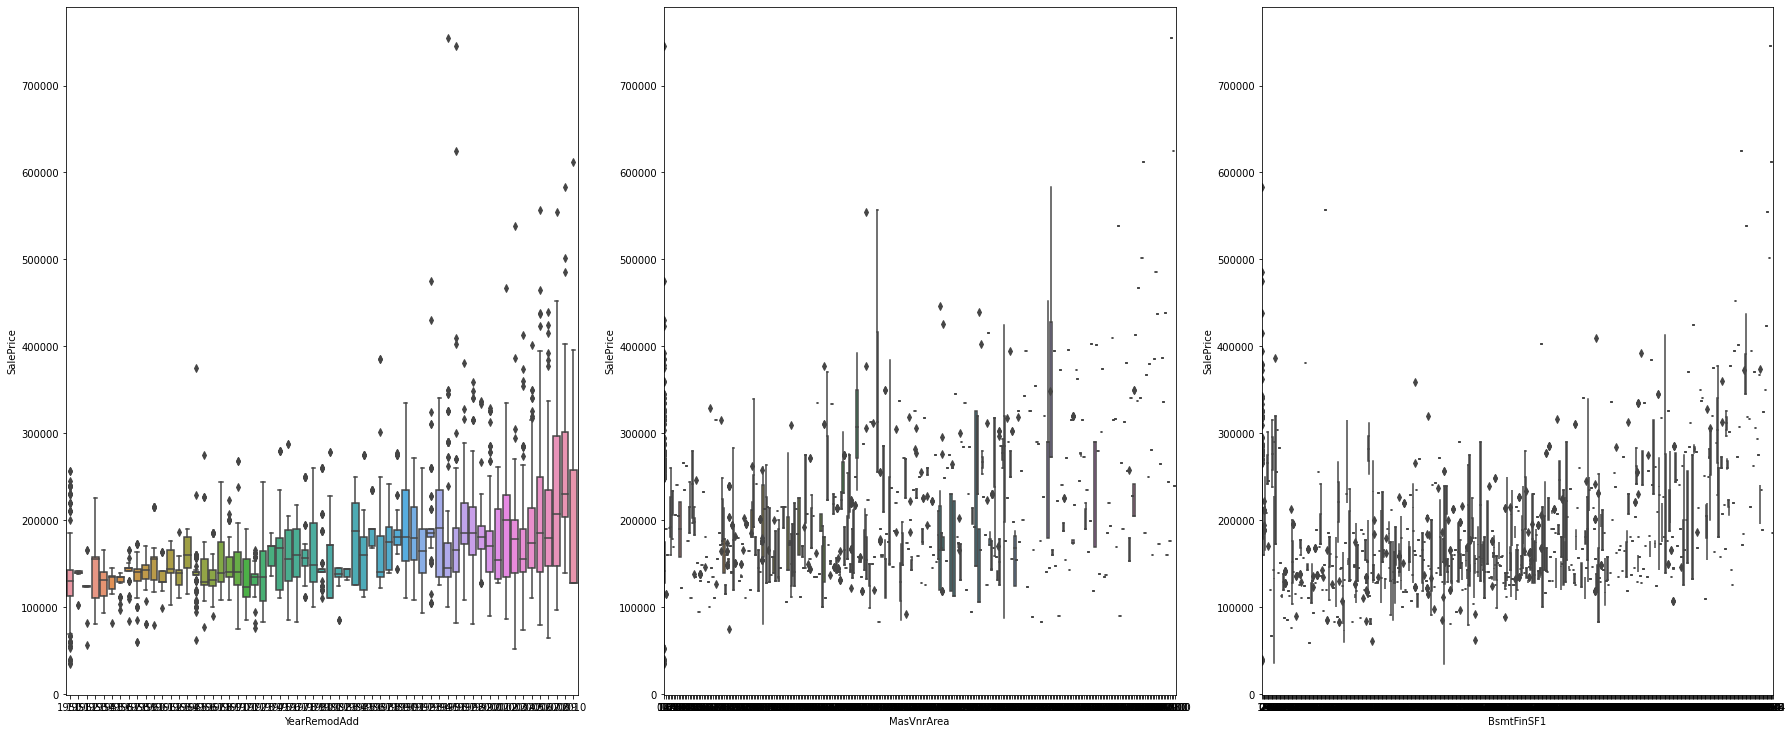

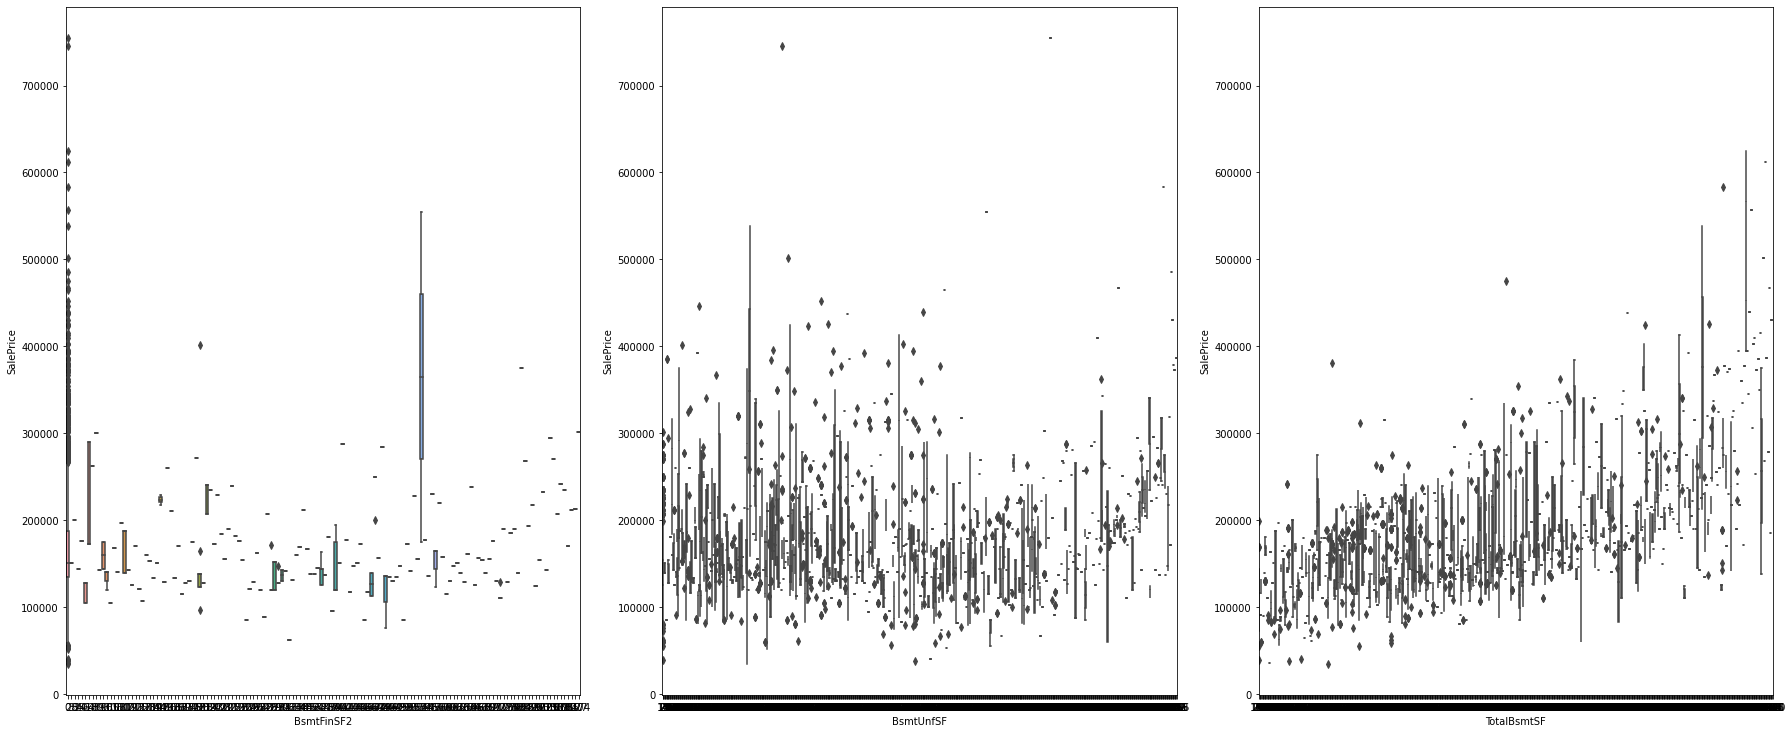

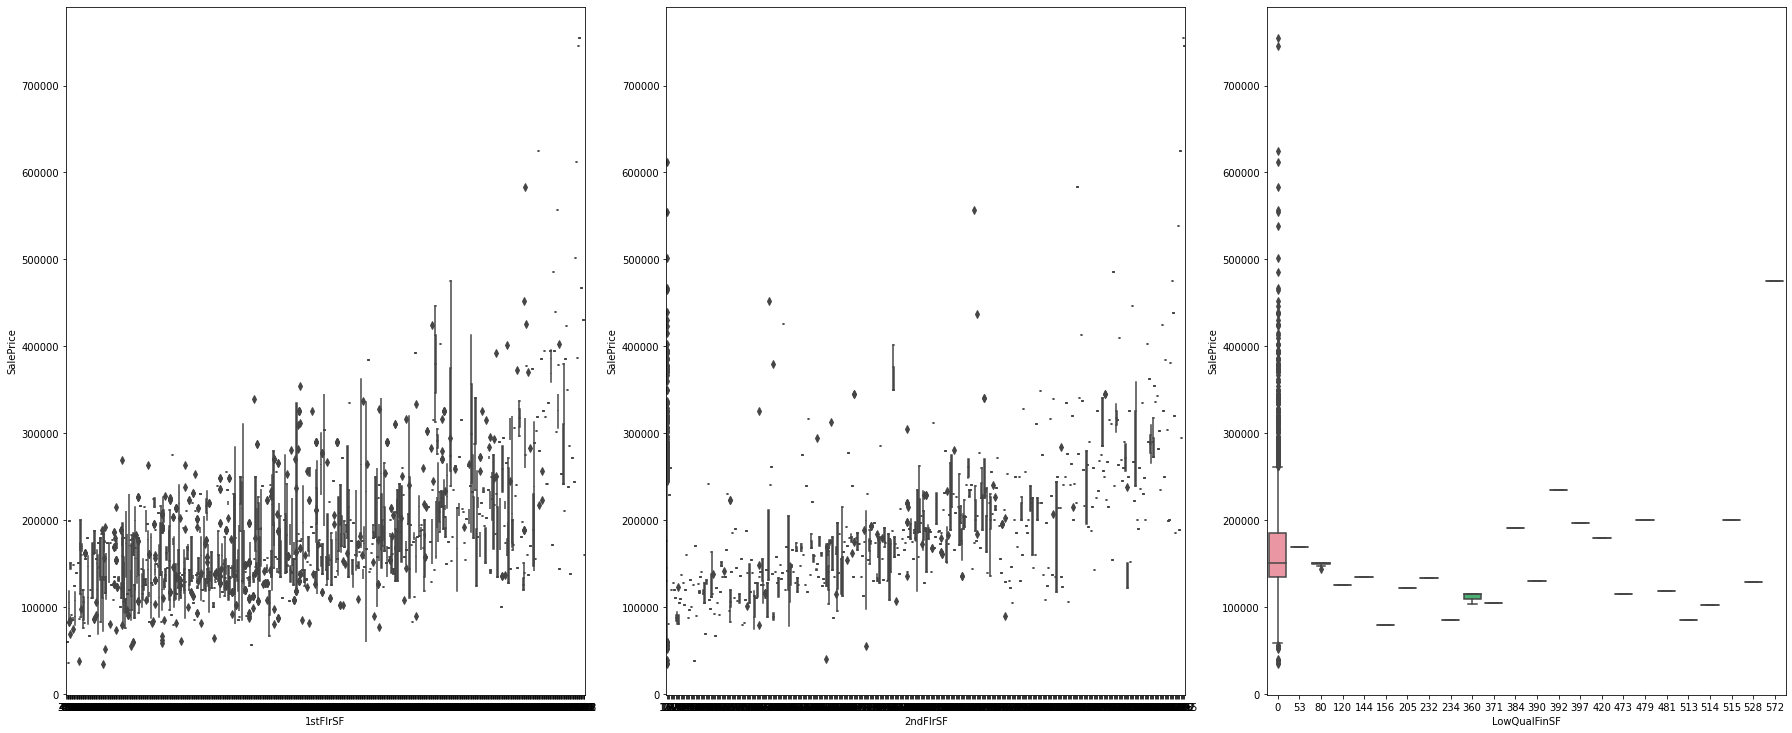

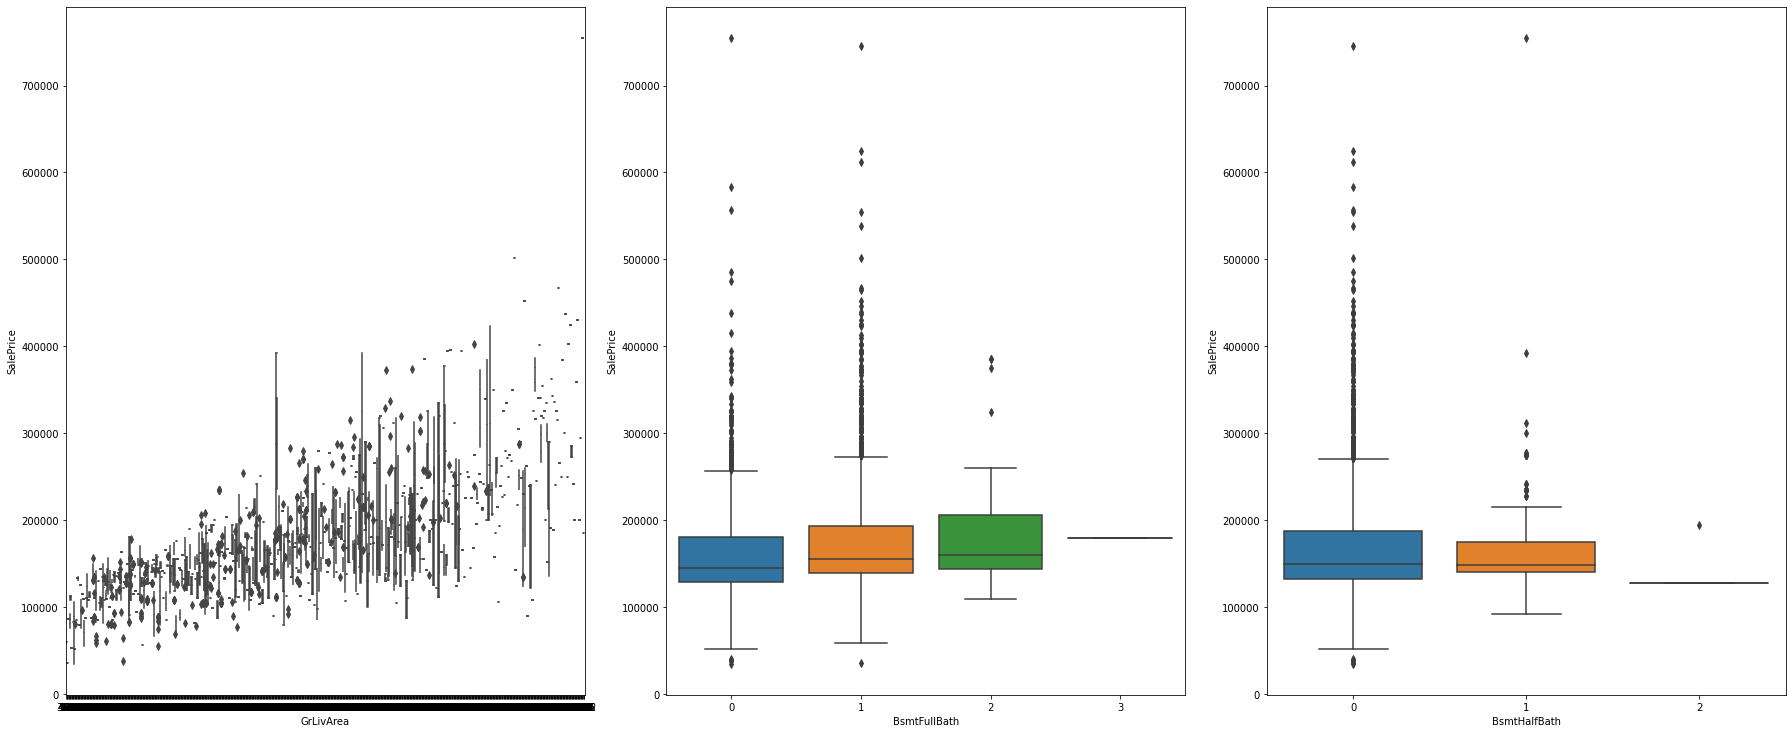

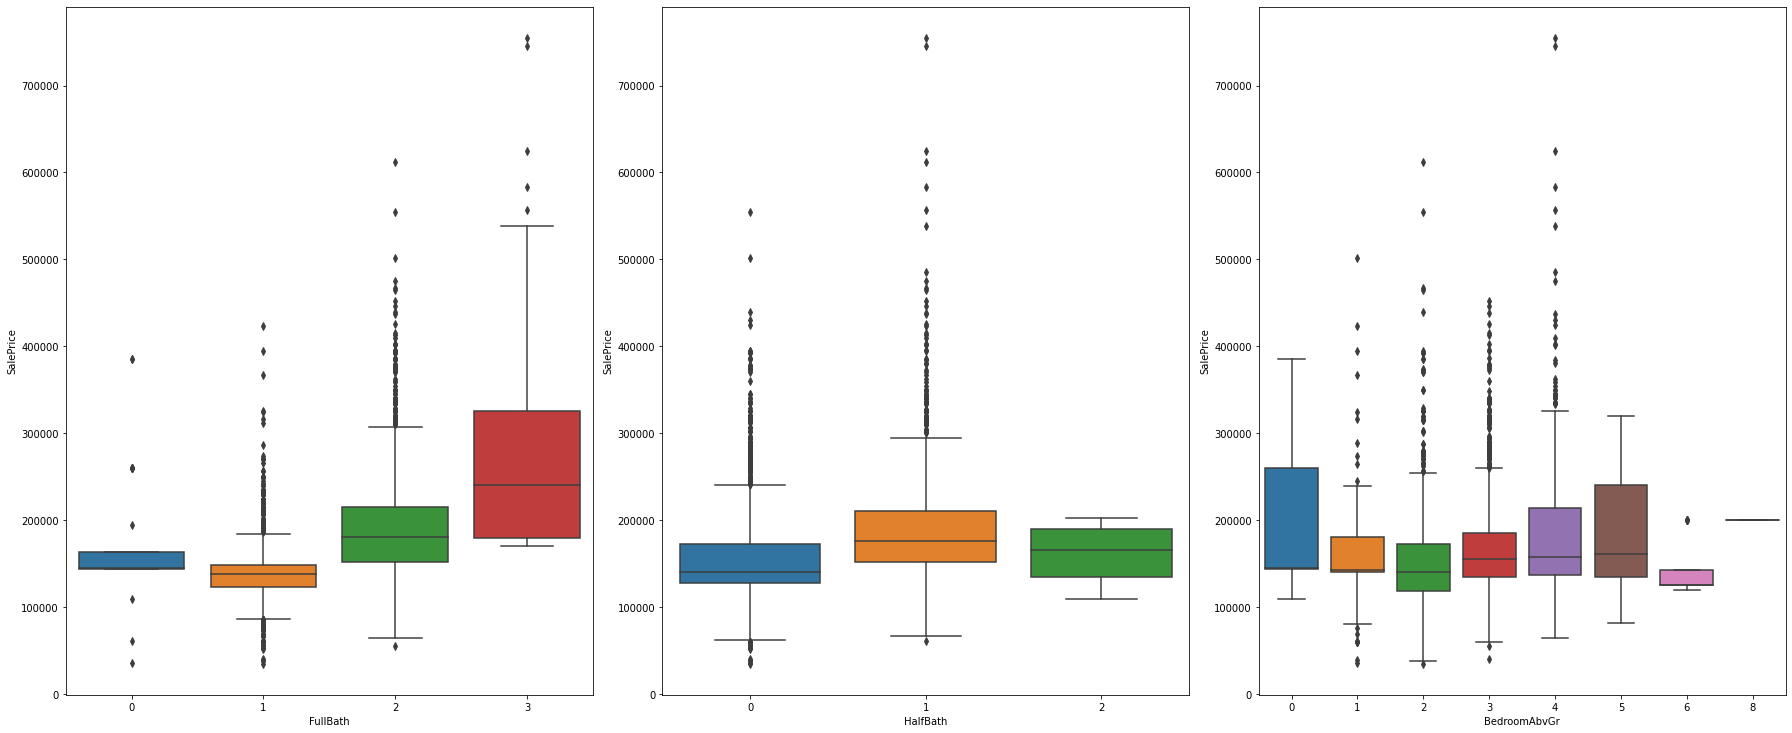

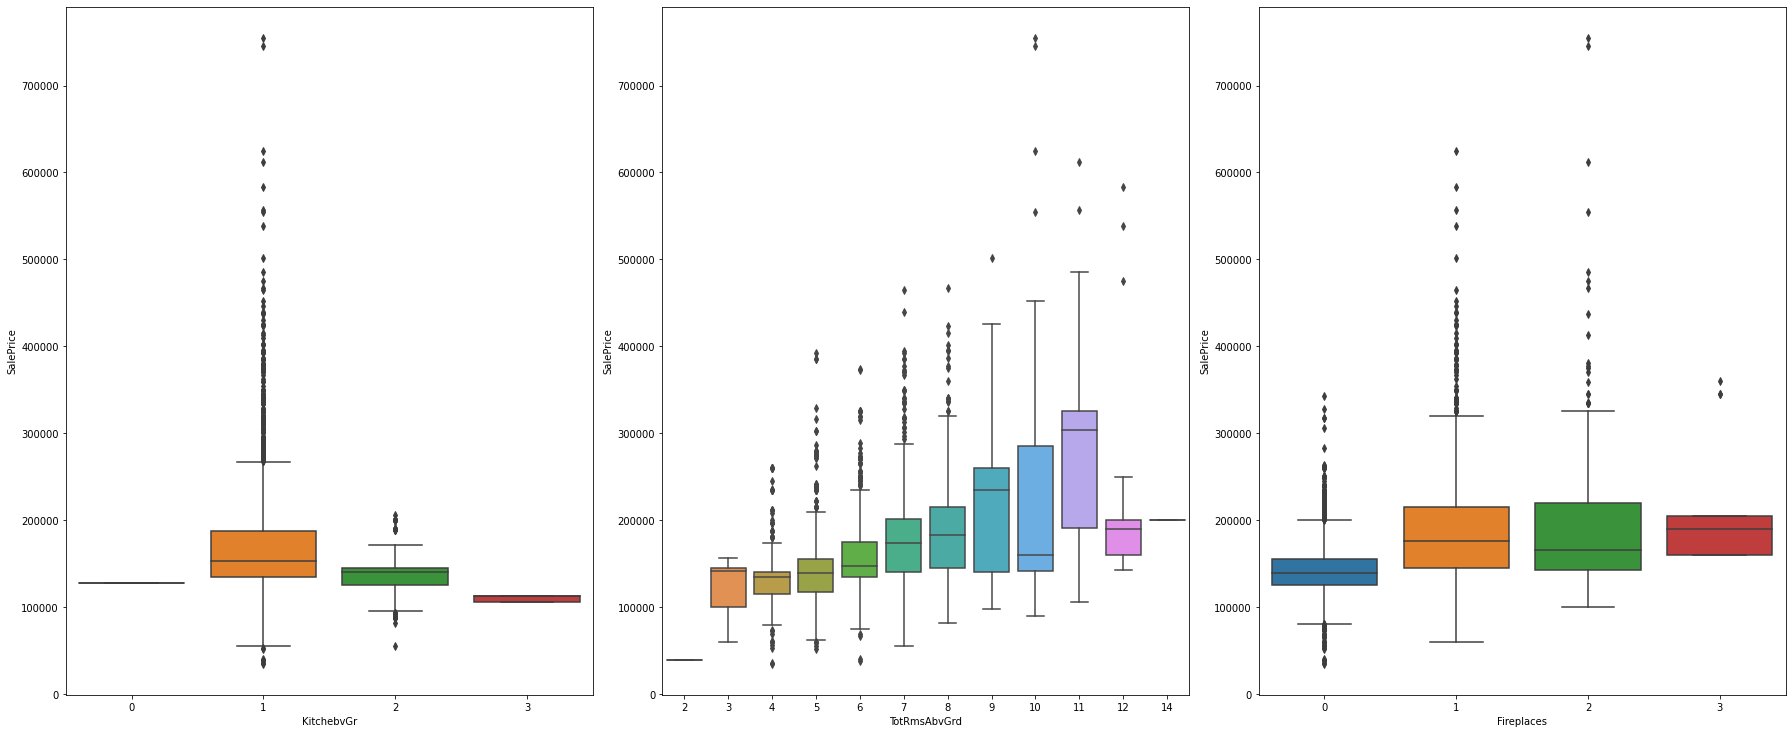

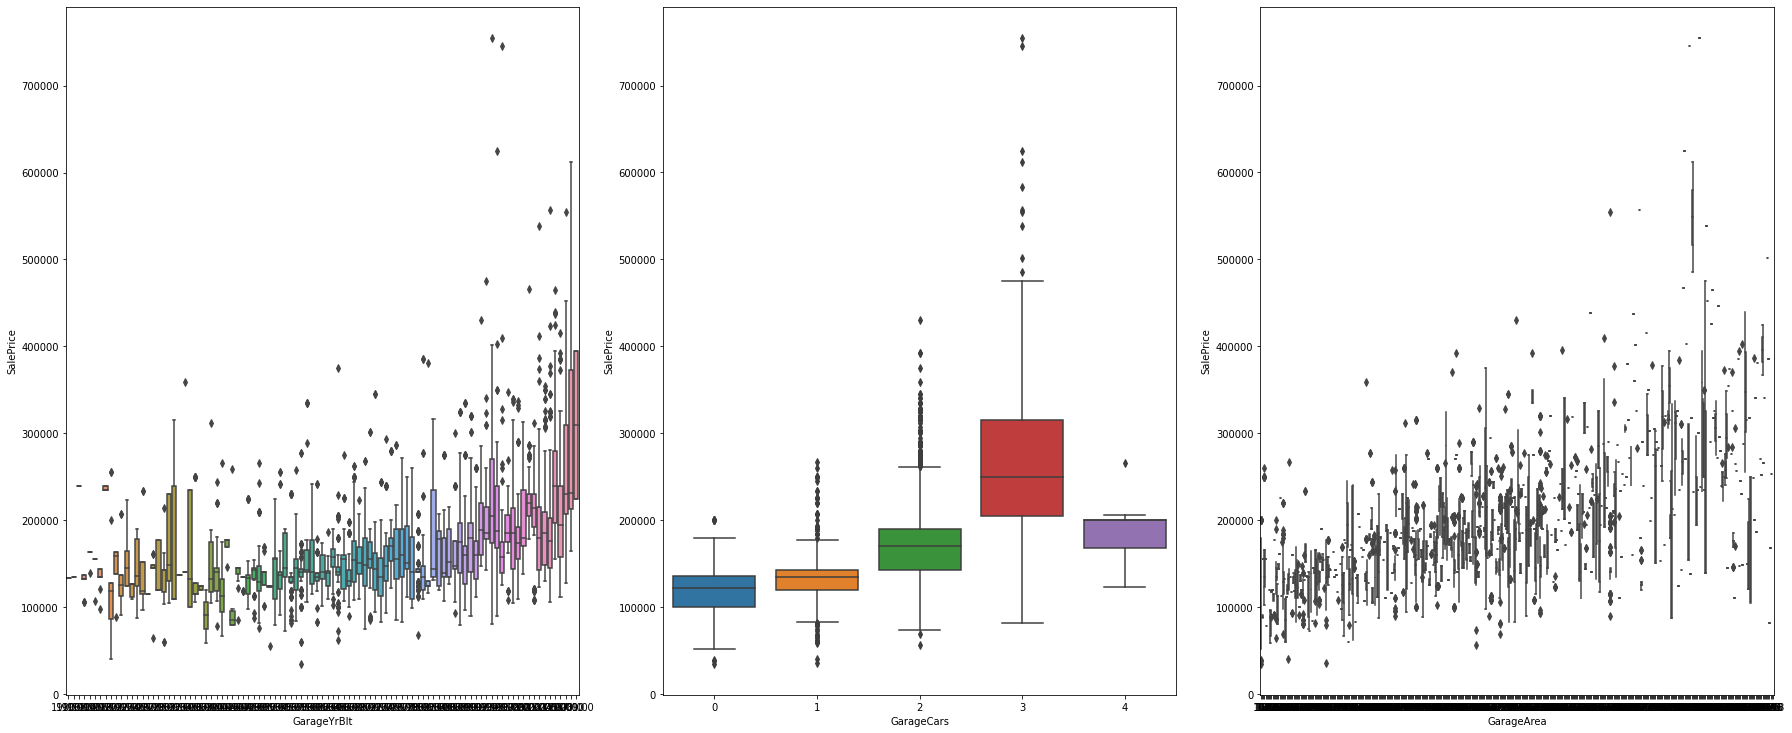

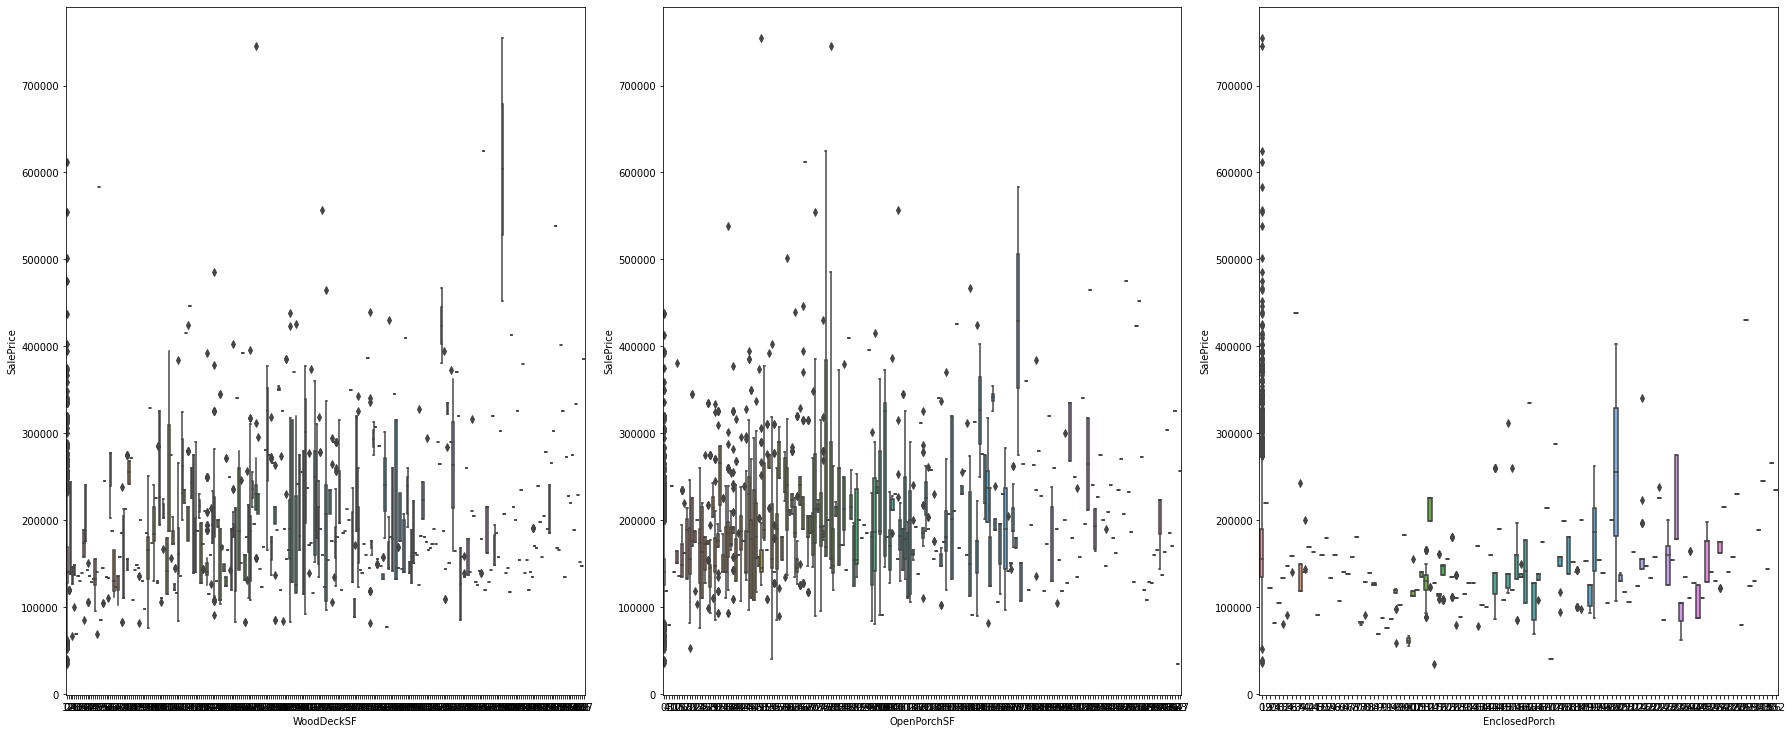

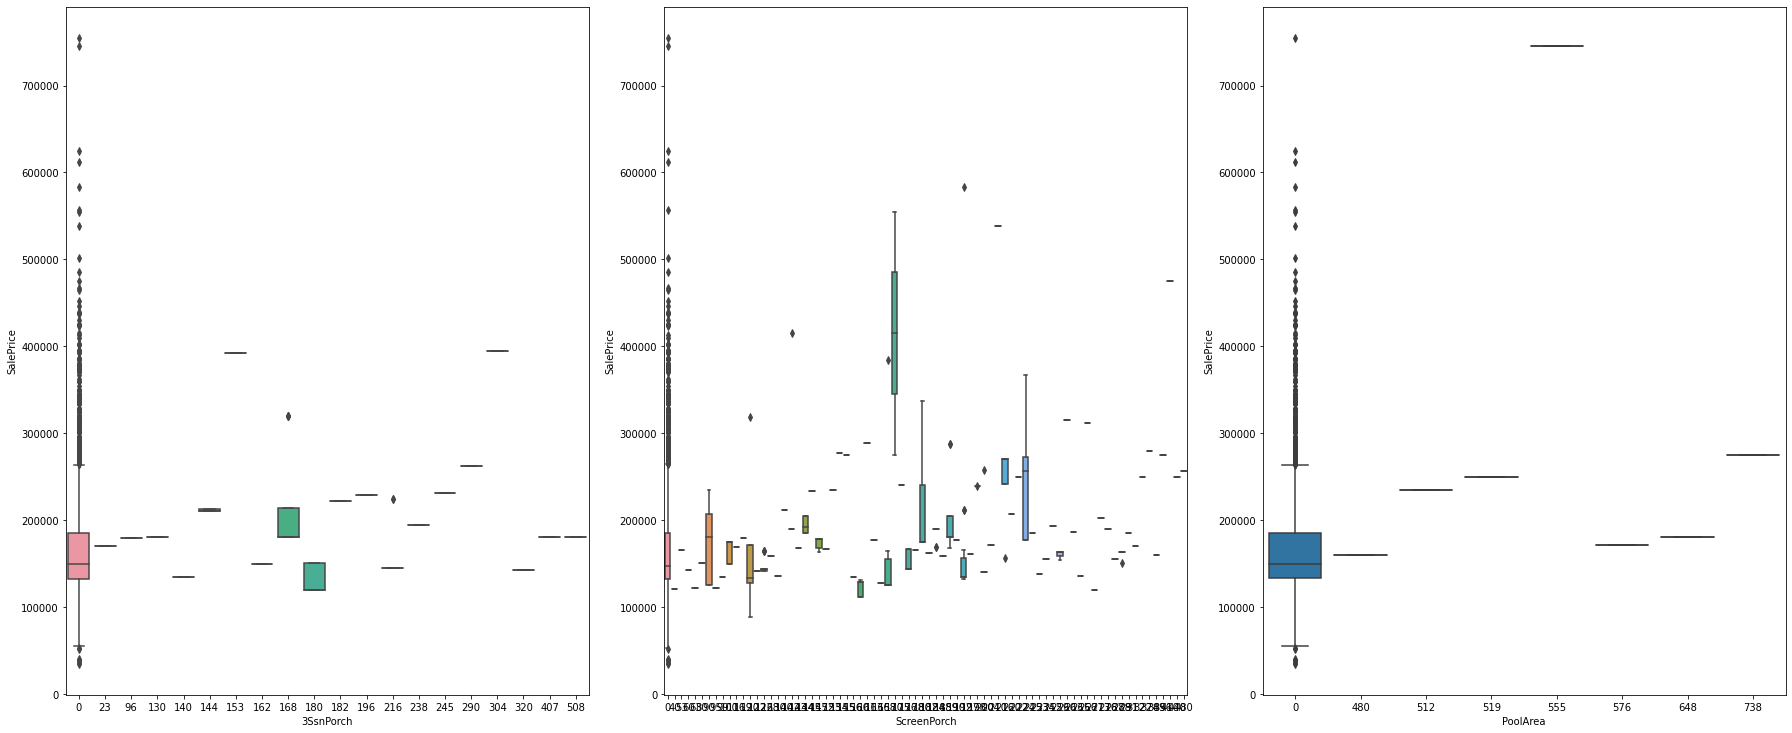

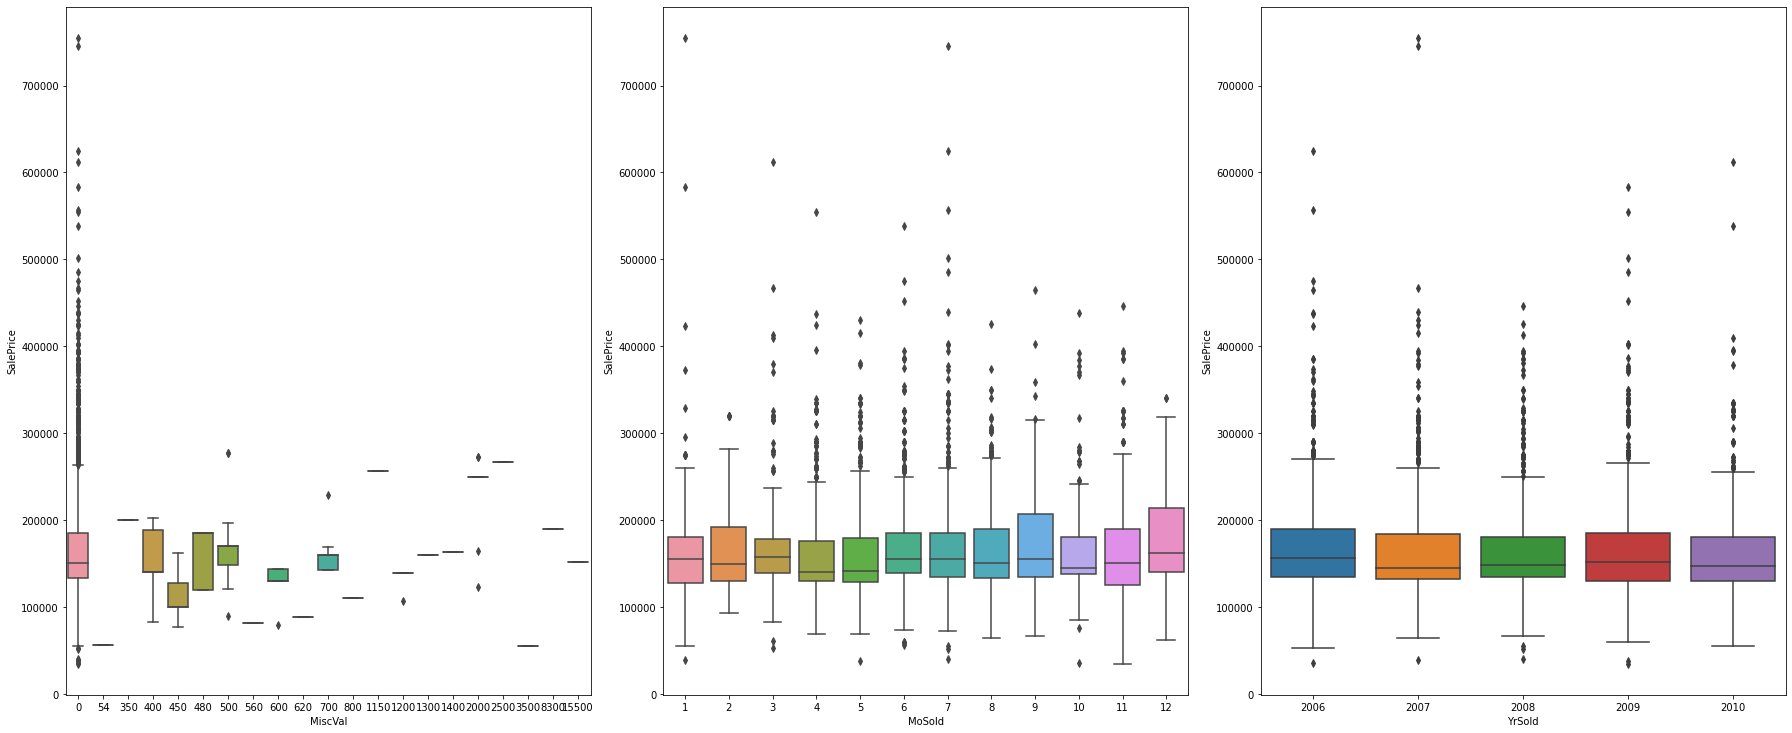

<Figure size 1800x1440 with 0 Axes>

In [55]:
#Function to plot all independent categorical variables with SalePrice and count plot
ix = 1
fig = plt.figure(figsize = (30,20))
for c in list(combined_signum.columns):
    if ix <= 3:
        if c != 'SalePrice':
            ax2 = fig.add_subplot(2,3,ix+3)
            sns.boxplot(data=combined_signum, x=c, y='SalePrice', ax=ax2) #for boxplot
            plt.tight_layout()           
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (25,20))
        ix =1